# Flight Price Prediction Machine Learning Model

## Overview
This notebook demonstrates the process of building machine learning models to predict flight prices using German air fare data. I will explore and compare the performance of three different algorithms:

1. Random Forest Regressor
2. Gradient Boosting Regressor
3. Random Forest Classifier

## Goal
My goal is to develop accurate models for predicting flight prices and gain insights into the factors that influence ticket costs in the German air travel market.

## Process
The notebook covers the following steps:
1. Data loading and exploration
2. Data preprocessing and feature engineering
3. Model training and evaluation
4. Hyperparameter tuning
5. Model comparison and interpretation

## Author
1. Ba Viet Anh (Henry) Nguyen


## Initialize a Virtual Environment using `Conda` (If you have your own `Virutal Environment` your then ignore this !)

In [1]:
# To activate the conda environment, copy the below content to `conda-config.sh` and run the following command in the terminal:
# sh conda-config.sh

'''conda-config.sh

# Create a new conda environment
conda create -n cos30049_env python=3.10.9
conda activate cos30049_env

# Check current environment
conda info --envs

#Check current python version
python --version

'''

'conda-config.sh\n\n# Create a new conda environment\nconda create -n cos30049_env python=3.10.9\nconda activate cos30049_env\n\n# Check current environment\nconda info --envs\n\n#Check current python version\npython --version\n\n'

## Install required libraries that are used for processing data and training model

In [2]:
### Install required libraries using requirements.txt
%pip install -r requirements.txt
###

### OR if you prefer installing libraries manually
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install scikit-learn
# %pip install scipy
# %pip install statsmodels
# %pip install mlxtend
# %pip install seaborn
# %pip install scikit-optimize
###


Note: you may need to restart the kernel to use updated packages.


##  Import necessary libraries for data analysis, visualization, and machine learning

- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- `sklearn` for machine learning models and preprocessing
- `statsmodels` for statistical models
- `datetime` for handling date and time data
- Other helper functions from sklearn for model evaluation and optimization


In [3]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from typing_extensions import Annotated, Union, Doc


## Load the **German Air Fares** dataset taken from https://data.mendeley.com/datasets/gz75x2pzr7/2

In [4]:
# load the csv file
df = pd.read_csv('German Air Fares.csv')
print(df.head(5))

          departure_city           arrival_city scrape_date departure_date  \
0  TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019     25.10.2019   
1  TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019     25.10.2019   
2  TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019     25.10.2019   
3  TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019     25.10.2019   
4  TXL Berlin-Tegel       DUS Düsseldorf         18.10.2019     25.10.2019   

  departure_date_distance departure_time arrival_time    airline   stops  \
0                  1 week         6:30am       7:45am  Eurowings  direct   
1                  1 week         6:40am       7:55am    easyJet  direct   
2                  1 week         6:45am       8:00am    easyJet  direct   
3                  1 week         6:15am       7:30am  Eurowings  direct   
4                  1 week         6:55am       8:10am  Eurowings  direct   

  price (€)  
0        74  
1        75  
2        80  
3        84  
4   

<h1>Exploratory Data Analysis</h1>

### Display statistics of the datasets
- Display the shape (x,y) of the dataset using `shape()` function.
- Display the type of the column using `dtype()` function.
- Describe the total number, the unique number, the top value, the frequency statistic of the data using `describe()` function

In [5]:
# descriptive statistic
print("\n Dataset shape: ", df.shape)
print("\n Column Type: \n", df.dtypes)
print("\nSummary statistics:\n",df.describe())


 Dataset shape:  (62627, 10)

 Column Type: 
 departure_city             object
arrival_city               object
scrape_date                object
departure_date             object
departure_date_distance    object
departure_time             object
arrival_time               object
airline                    object
stops                      object
price (€)                  object
dtype: object

Summary statistics:
                departure_city           arrival_city scrape_date  \
count                   62626                  62626       62626   
unique                     19                     19           7   
top     TXL Berlin-Tegel       TXL Berlin-Tegel       24.10.2019   
freq                    13158                  12698       16841   

       departure_date departure_date_distance departure_time arrival_time  \
count           62626                   62626          62626        62626   
unique             42                       7            404          415   
top  

### Display duplications and inconsistences
- Display total missing values for each column using `isnull()` function.
- Display the total duplicated rows using `duplicated()` function.
- Display the total unique value of each column using `nunique()` function.

In [6]:
# data quality assesment
print("\nMissing value:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nUnique value in each column:")
for col in df.columns:
    print(col, ":", df[col].nunique())


Missing value:
 departure_city             1
arrival_city               1
scrape_date                1
departure_date             1
departure_date_distance    1
departure_time             1
arrival_time               1
airline                    1
stops                      1
price (€)                  0
dtype: int64

Duplicate rows: 804

Unique value in each column:
departure_city : 19
arrival_city : 19
scrape_date : 7
departure_date : 42
departure_date_distance : 7
departure_time : 404
arrival_time : 415
airline : 15
stops : 4
price (€) : 528


### Display number of each categorized variables for each columns

In [7]:
#analyze categorical variables:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")  # print the name of the column
    print(df[col].value_counts())  # print the value counts for each category



Value counts for departure_city:
departure_city
TXL Berlin-Tegel         13158
DUS Düsseldorf            6506
MUC München               6327
HAM Hamburg               5978
STR Stuttgart             4637
CGN Köln/Bonn             4471
NUE Nürnberg              3987
FRA Frankfurt/Main        3855
FDH Friedrichshafen       2651
DRS Dresden               2617
LEJ Leipzig/Halle         2275
HAJ Hannover              1543
BRE Bremen                1453
FKB Karlsruhe/Baden-B     1284
SCN Saarbrücken            793
FMO Münster/Osnabrück      638
DTM Dortmund               228
PAD Paderborn/Lippsta      165
RLG Rostock-Laage           60
Name: count, dtype: int64

Value counts for arrival_city:
arrival_city
TXL Berlin-Tegel         12698
MUC München               7205
HAM Hamburg               5985
DUS Düsseldorf            5844
FRA Frankfurt/Main        4853
CGN Köln/Bonn             4783
STR Stuttgart             4723
NUE Nürnberg              4377
FDH Friedrichshafen       2590
DRS Dresden 

## Data Preprocessing

### `standardize_time()` helper function
`standardize_time()` helper function to convert various time formats to a standardized 24-hour format string.

**Input**
- `time_str` (str): A time-like string in various formats (e.g., "12:30 PM", "12:30 uhr", "14:30")

**Output**
- Returns a standardized time string in 24-hour format (e.g., "14:30")

**Functionalitites**
1. Handles AM/PM format
2. Handles "uhr" format (German time)
3. Handles 24-hour format with or without minutes
4. Strips whitespace and converts to lowercase for consistency
5. Returns None if unable to parse the time string


In [8]:
# Convert the arrival and departure time to same format  (consistently in 24 hour format)
def standardize_time(time_str: Annotated[str, Doc("The time-like string to be converted")]) -> Annotated[str, Doc("The standardized time string")]:
    """
    Convert a time-like string to a standardized 24-hour format string.

    Args:
        - time_str (str): The time-like string to be converted.

    Returns:
        - str: The standardized time string.

    Examples:
        >>> standardize_time("12:30 PM") # "12:30"
        >>> standardize_time("12:30 uhr") # "12:30"
    """
    # remove leading/trailing whitespace
    time_str = time_str.strip().lower()
    try:
    # handle 'am' or 'pm' format to 12 hour format (convert to datetime datatype)
        if 'am' in time_str or 'pm' in time_str:
            time_obj = datetime.strptime(time_str, '%I:%M%p')
        #handle 'uhr'
        elif 'uhr' in time_str:
            time_str = time_str.replace("uhr", "").strip()
            if ":" in time_str:
                time_obj = datetime.strptime(time_str, '%H:%M')
            else:
                time_obj = datetime.strptime(time_str, '%H')
        #handle 24-hour format
        else:
            if ":" in time_str:
                time_obj = datetime.strptime(time_str, '%H:%M')
            else:
                time_obj = datetime.strptime(time_str, '%H')
        #convert to 24 hour format
        return time_obj.strftime('%H:%M')
    except ValueError:
        print(f"Unable to parse time: {time_str}")
        return None

### `convert_number_date_distance()` helper function

`convert_number_date_distance()` helper function to convert a time-like string representing the departure date distance (how far in advance the flight was booked) to a number of days.

**Input**
- `time_str` (str): A time-like string in various formats (e.g., "1 day", "2 weeks", "3 months")/

**Output**
- Number of days as an integer (e.g., "2 weeks" -> 14)

**Functionalities:**
1. Handles various time units: days, weeks, months, and years
2. Converts the input to lowercase and splits it for easier parsing
3. Returns the number of days as an integer
4. Returns None if the time string cannot be parsed


Note: This function assumes 30 days per month and 365 days per year for simplicity.


In [9]:
# convert the departure_date_distance format to day format (how long)  // def: departure_date_distance: How far in advance the flight was booked
def convert_number_date_distance(time_str: Annotated[str, Doc("The time-like string to be converted")]) -> Annotated[int, Doc("The number of days")]:
    """
    Convert a time-like string to a number of days.

    Args:
        - time_str (str): The time-like string to be converted.

    Returns:
        - int: The number of days.

    Examples:
        >>> convert_number_date_distance("1 day") # 1
        >>> convert_number_date_distance("2 weeks") # 14
        >>> convert_number_date_distance("3 months") # 90
    """
    time_str = time_str.strip().lower().split(" ")
    if "day" in time_str:
        return int(time_str[0])
    elif "week" in time_str or "weeks" in time_str:
        return int(time_str[0]) * 7
    elif "month" in time_str or "months" in time_str:
        return int(time_str[0]) * 30
    elif "year" in time_str or "year" in time_str:
        return int(time_str[0]) * 365
    else:
        return None

### Data Cleaning
This section performs data cleaning and preprocessing steps on the DataFrame `df` based on the procedures below:

1. Removes null and duplicate rows
2. Strips whitespace from string columns
3. Casts the price columns to float and rename the column
4. Casts date columns to datetime format
5. Casts the 'stops' column to numerical values
6. Uses the helper function `standardize_time()` to standardize and convert arrival and departure times
7. Uses the helper function `convert_number_date_distance()` function to the 'departure_date_distance' column



In [10]:
# clean data
# drop the null value ( decide to remove the row because the dataset actually has only one row with null value and this row only have price column, remaining columns are null)
df = df.dropna()

# total rows before removing duplicates
print("\nTotal rows before removing duplicates: ", df.shape[0])

#remove the exact duplicate rows
df = df.drop_duplicates()

# total rows after removing duplicates
print("\nTotal rows after removing duplicates: ", df.shape[0])

#strip whitespace from string column
object_column = df.select_dtypes(include="object").columns
df[object_column] = df[object_column].apply(lambda x: x.str.strip())

#convert price column to float
df["price (€)"] = df["price (€)"].str.replace(",", "").str.replace("€", "").str.strip()  # remove the comma in some prices to make sure data is consistent
df["price (€)"] = df["price (€)"].astype(float)
df.rename(columns={'price (€)': 'price'}, inplace=True)  # rename the column for better readability

# convert date columns to datetime
df["departure_date"] = pd.to_datetime(df["departure_date"], format='%d.%m.%Y')
df['scrape_date'] = pd.to_datetime(df["scrape_date"], format='%d.%m.%Y')

# convert the stops column to numerical value
df["stops"] = df["stops"].replace("direct", 0)
df["stops"] = df["stops"].replace("(1 Stopp)", 1)
df["stops"] = df["stops"].replace("(1 stop)", 1)
df["stops"] = df["stops"].replace("(2 Stopps)", 2)


#apply convert for arrival_time and departure time to standardize format
df["arrival_time"] = df["arrival_time"].apply(standardize_time)
df["departure_time"] = df["departure_time"].apply(standardize_time)

#convert arrival_time and departure_time to datetime datatype
df["arrival_time"] = pd.to_datetime(df["arrival_time"], format='%H:%M').dt.time
df["departure_time"] = pd.to_datetime(df["departure_time"], format='%H:%M').dt.time

df["departure_date_distance"] = df["departure_date_distance"].apply(convert_number_date_distance)


Total rows before removing duplicates:  62626

Total rows after removing duplicates:  61822


/var/folders/d9/kz74ycxx51xgf_md1xlhtzdr0000gn/T/ipykernel_16768/3873158783.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["stops"] = df["stops"].replace("(2 Stopps)", 2)


### `times_to_minute()` helper function
`times_to_minute()` helper function to convert a datetime object, specifically the hour object (HH:mm), to number of minutes.

**Input**
- `time_obj` (datetime): The time object to be converted in `datetime` format.

**Output**
- Number of minutes as an integer (e.g., "2:30" -> 150)

**Functionalities:**
1. Convert to number of minutes by taking the number of hours times 60 and sum with the number of minutes


In [11]:
# function to convert time to minutes
def times_to_minute (time_obj: Annotated[datetime, Doc("The time object to be converted")]) -> Annotated[int, Doc("The number of minutes")]:
     """
     Convert a time object to the number of minutes.

     Args:
         - time_obj (datetime): The time object to be converted.

     Returns:
         - int: The number of minutes.
     """
     return time_obj.hour * 60 + time_obj.minute  # convert time to minutes

### Feature Engineering

This section focuses on preprocessing the data and creating new features to enhance My analysis and model performance.

#### New Features Created:

1. `flight_duration_in_minutes`: Calculates the duration of each flight in minutes.
   - For flights with stops, it accounts for potential overnight flights.

2. `departure_time_in_minutes_from_midnight`: Converts departure time to minutes from midnight.
   - This feature can help capture time-of-day effects on flight prices.

3. `day_of_week`: Extracts the day of the week from the departure date (0 for Monday, 6 for Sunday).

4. `day_of_month`: Extracts the day of the month from the departure date.

5. `month`: Extracts the month from the departure date.

6. `year`: Extracts the year from the departure date.

7. `price_category`: Categorizes flights into 'budget', 'moderate', or 'expensive' based on price ranges.
   - Budget: < $200
   - Moderate: $200 - $500
   - Expensive: > $500



In [12]:
#create a new column for flight duration in minutes
# condition for flight duration (if stops more than 1 so the duration cannot be lower than 150)
df["flight_duration_in_minutes"] = df["arrival_time"].apply(times_to_minute) - df["departure_time"].apply(times_to_minute)
df.loc[(df['flight_duration_in_minutes'] < 150) & (df['stops'] != 0), 'flight_duration_in_minutes'] = (1440 - df['departure_time'].apply(times_to_minute)) + df['arrival_time'].apply(times_to_minute)

# create departure_time_in_minutes_from_midnight      => the flight price is apparently affected by the departure_time
df["departure_time_in_minutes_from_midnight"] = df["departure_time"].apply(times_to_minute)

# create a new column for the day of the week of the departure date (day_number) (monday is 0, sunday is 6)
df["day_of_week"] = df["departure_date"].dt.weekday

#create a new column for the day of the month of the departure date (day_number)
df["day_of_month"] = df["departure_date"].dt.day

#create a new column for the month of the departure date (month_number)
df["month"] = df["departure_date"].dt.month


# create new column for the year of the departure date
df["year"] = df["departure_date"].dt.year

# create new column call 'price_category' to categorize the price into 3 categories: budget, moderate, expensive
df['price_category'] = pd.cut(df['price'], bins=[-float('inf'), 200, 500, float('inf')], labels=['budget', 'moderate', 'expensive'])  # categorize the price into 3 categories based on the price range (0-200: budget, 200-500: moderate, 500+: expensive)


### Drop irrelevant columns

In [13]:
# drop the column that is obviously irrelevant
df.drop(columns=["scrape_date"], inplace=True, axis=1)  # this is just the data collection artifact

# drop the time stamp column
df.drop(columns=["departure_time", "arrival_time", "departure_date"], inplace=True, axis=1)  # already have the departure_time_in_minutes_from_midnight and durations

# drop the airline named

### Show the pre-processed datasets

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61822 entries, 0 to 62625
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   departure_city                           61822 non-null  object  
 1   arrival_city                             61822 non-null  object  
 2   departure_date_distance                  61822 non-null  int64   
 3   airline                                  61822 non-null  object  
 4   stops                                    61822 non-null  int64   
 5   price                                    61822 non-null  float64 
 6   flight_duration_in_minutes               61822 non-null  int64   
 7   departure_time_in_minutes_from_midnight  61822 non-null  int64   
 8   day_of_week                              61822 non-null  int32   
 9   day_of_month                             61822 non-null  int32   
 10  month                                  

### Expect the `dropna()` function runs correctly by looking at the number of null values

In [15]:
df.isnull().sum()  # double check whether drop successfull or not

departure_city                             0
arrival_city                               0
departure_date_distance                    0
airline                                    0
stops                                      0
price                                      0
flight_duration_in_minutes                 0
departure_time_in_minutes_from_midnight    0
day_of_week                                0
day_of_month                               0
month                                      0
year                                       0
price_category                             0
dtype: int64

### Show the dataset after being processed

In [16]:
df.describe()

,departure_date_distance,stops,price,flight_duration_in_minutes,departure_time_in_minutes_from_midnight,day_of_week,day_of_month,month,year
count,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000
mean,65.230161,0.579923,205.222008,303.977451,775.067080,3.182540,17.724871,8.033338,2019.354485
std,62.578653,0.592062,148.781235,306.806157,285.670144,1.928088,9.486406,4.108248,0.478361
min,7.000000,0.000000,26.000000,45.000000,110.000000,0.000000,1.000000,1.000000,2019.000000
25%,14.000000,0.000000,100.000000,70.000000,520.000000,2.000000,7.000000,4.000000,2019.000000
50%,42.000000,1.000000,160.000000,185.000000,750.000000,3.000000,21.000000,10.000000,2019.000000
75%,90.000000,1.000000,332.000000,455.000000,1035.000000,5.000000,24.000000,11.000000,2020.000000
max,180.000000,2.000000,3088.000000,1585.000000,1350.000000,6.000000,31.000000,12.000000,2020.000000


## Handle Outliers Of Data

### `detect_outliers()` helper function
`detect_outliers` helper function is used for detecting the outliers in the specified columns of the DataFrame using the **Interquartile** method.
 
**Input**
- `df` (pd.DataFrame): The DataFrame to be detected
- `cols` (list[str]): The list of columns to be detected.

**Output**
- A dictionary with column names as keys and the count of outliers as values.

**Functionalities:**
1. Find the first quartile (Q1) and third quartile (Q3) for each specified column.
2. Computes the Interquartile Range (IQR) as Q3 - Q1.
3. Determines the lower and upper bounds for outliers using the formula:
   - Lower bound = Q1 - 1.5 * IQR
   - Upper bound = Q3 + 1.5 * IQR
4. Identifies data points falling below the lower bound or above the upper bound as outliers.
5. Counts the number of outliers for each column.
6. Returns a dictionary containing the count of outliers for each specified column.


In [17]:
#detect outliers function by using IQR method
def detect_outliers(df: Annotated[pd.DataFrame, Doc("The DataFrame to be detected")], cols: Annotated[list[str], Doc("The columns to be detected")]) -> dict:
    """
    Detect outliers in specified columns of the DataFrame using the IQR method.

    Args:
        - df (pd.DataFrame): The DataFrame containing the data.
        - cols (list[str]): The list of columns to be detected.

    Returns:
        - dict: A dictionary with column names as keys and the count of outliers as values.
    """
    outliers: dict = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)  # 1st quartile
        Q3 = df[col].quantile(0.75)  # 3rd quartile
        IQR = Q3 - Q1  # interquartile range
        lower_bound = Q1 - 1.5 * IQR  # lower bound
        upper_bound = Q3 + 1.5 * IQR  # upper bound
        outliers[col] = df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]  #count of outliers in each column (column: count of rows)
    return outliers


### `plot_boxplots()` helper function
`plot_boxplots()` helper function is used for plotting box plots for specified columns in a processed dataset.
 
**Input**
- `df` (pd.DataFrame): The DataFrame to be used for plotting
- `cols` (list[str]): The list of columns to be used for plotting

**Output**
- A box plot


In [18]:
#boxplot to visualize outliers
def plot_boxplots(df: Annotated[pd.DataFrame, Doc("The DataFrame to be plotted")], columns: Annotated[list[str], Doc("The columns to be plotted")]) -> None:
    """
    Plot boxplots for specified columns in the DataFrame.

    Args:
        - df (pd.DataFrame): The DataFrame containing the data.
        - columns (list[str]): The list of columns to be plotted.

    Returns:
        - None
    """
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5*len(columns)))  # create subplots based on number of columns
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])  # create boxplot for each column
        axes[i].set_title(f'Boxplot of {col}')  # set title for each boxplot
    plt.tight_layout()  # adjust the layout (automatically adjust the subplot parameters to give specified padding)
    plt.show()

### Main logic for detecting and handling outlier detection

The given steps show how I have performed detecting and handling outlier on My dataset:

1. Identify numerical columns (except the target 'price' column)
2. Plot boxplots before outlier handling to visualize the distribution and potential outliers
3. Detect outliers using the Interquartile Range (IQR) method
4. Handle outliers using the capping method (setting values to the 1st and 99th percentiles)
5. Plot boxplots after outlier handling to see the effect
6. Calculate and print the percentage of data retained after outlier handling
7. Visualize the distribution of flight prices after outlier handling

These processes have helped me identify and mitigate the impact of extreme values in My dataset, which could potentially create a negative impact to My data.


Plotting boxplots before outlier handling...


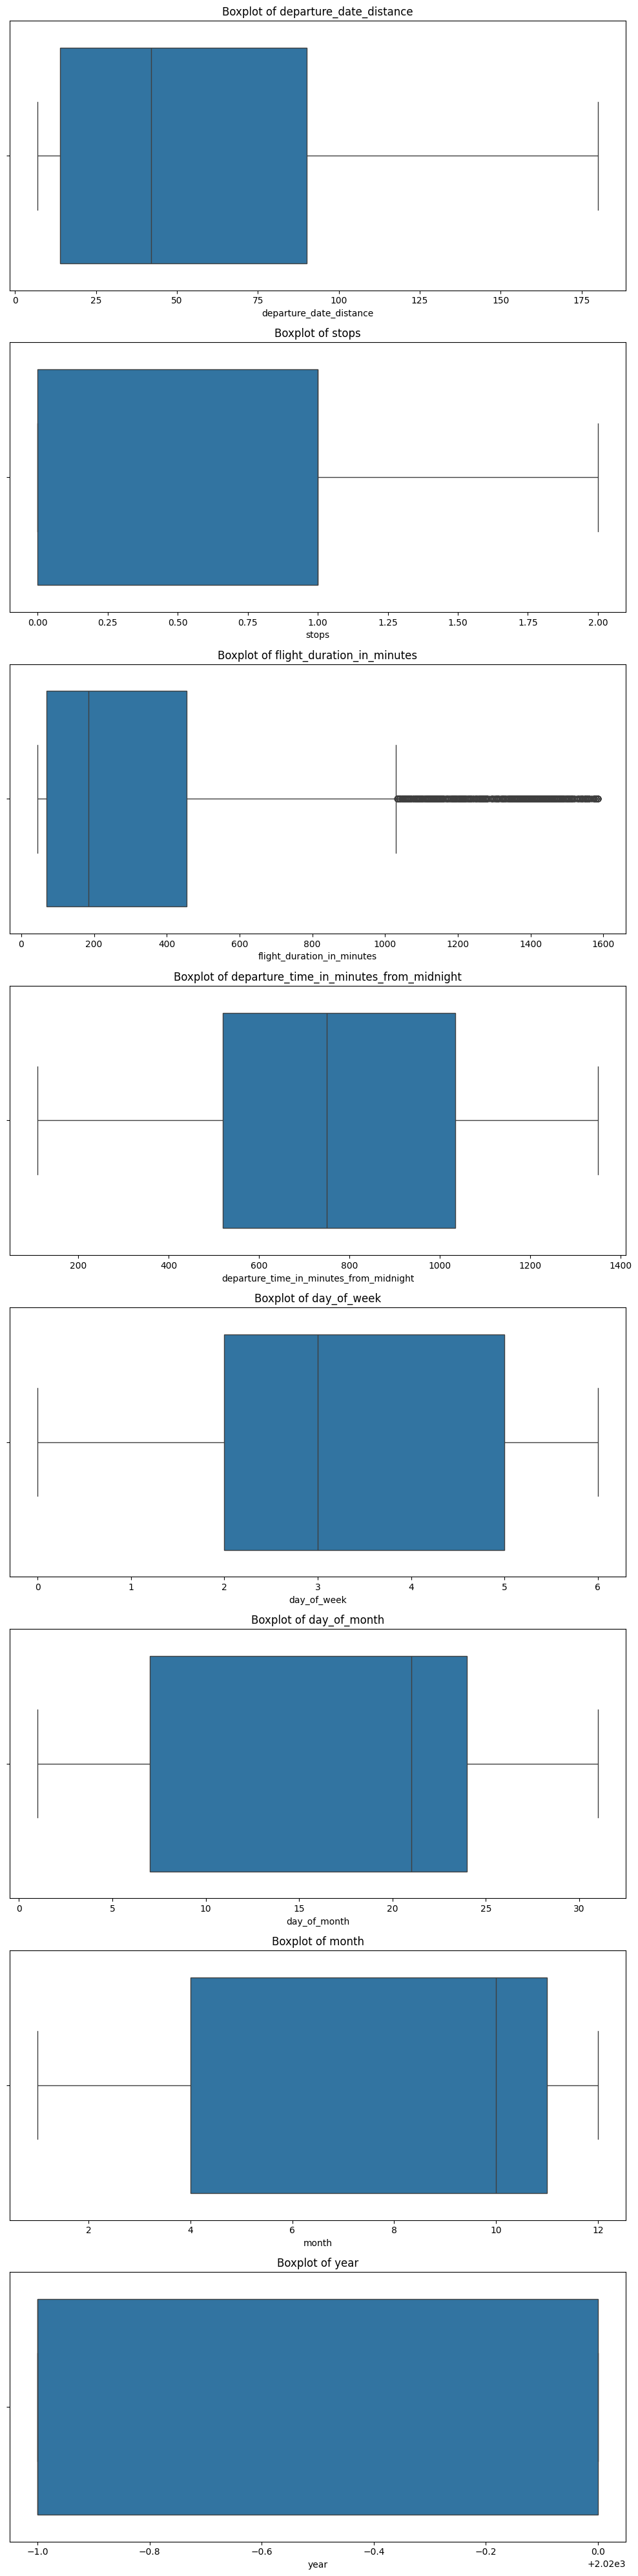

Number of outliers in each column:  {'departure_date_distance': 0, 'stops': 0, 'flight_duration_in_minutes': 1506, 'departure_time_in_minutes_from_midnight': 0, 'day_of_week': 0, 'day_of_month': 0, 'month': 0, 'year': 0}
Total number of rows before outlier handling: 61822


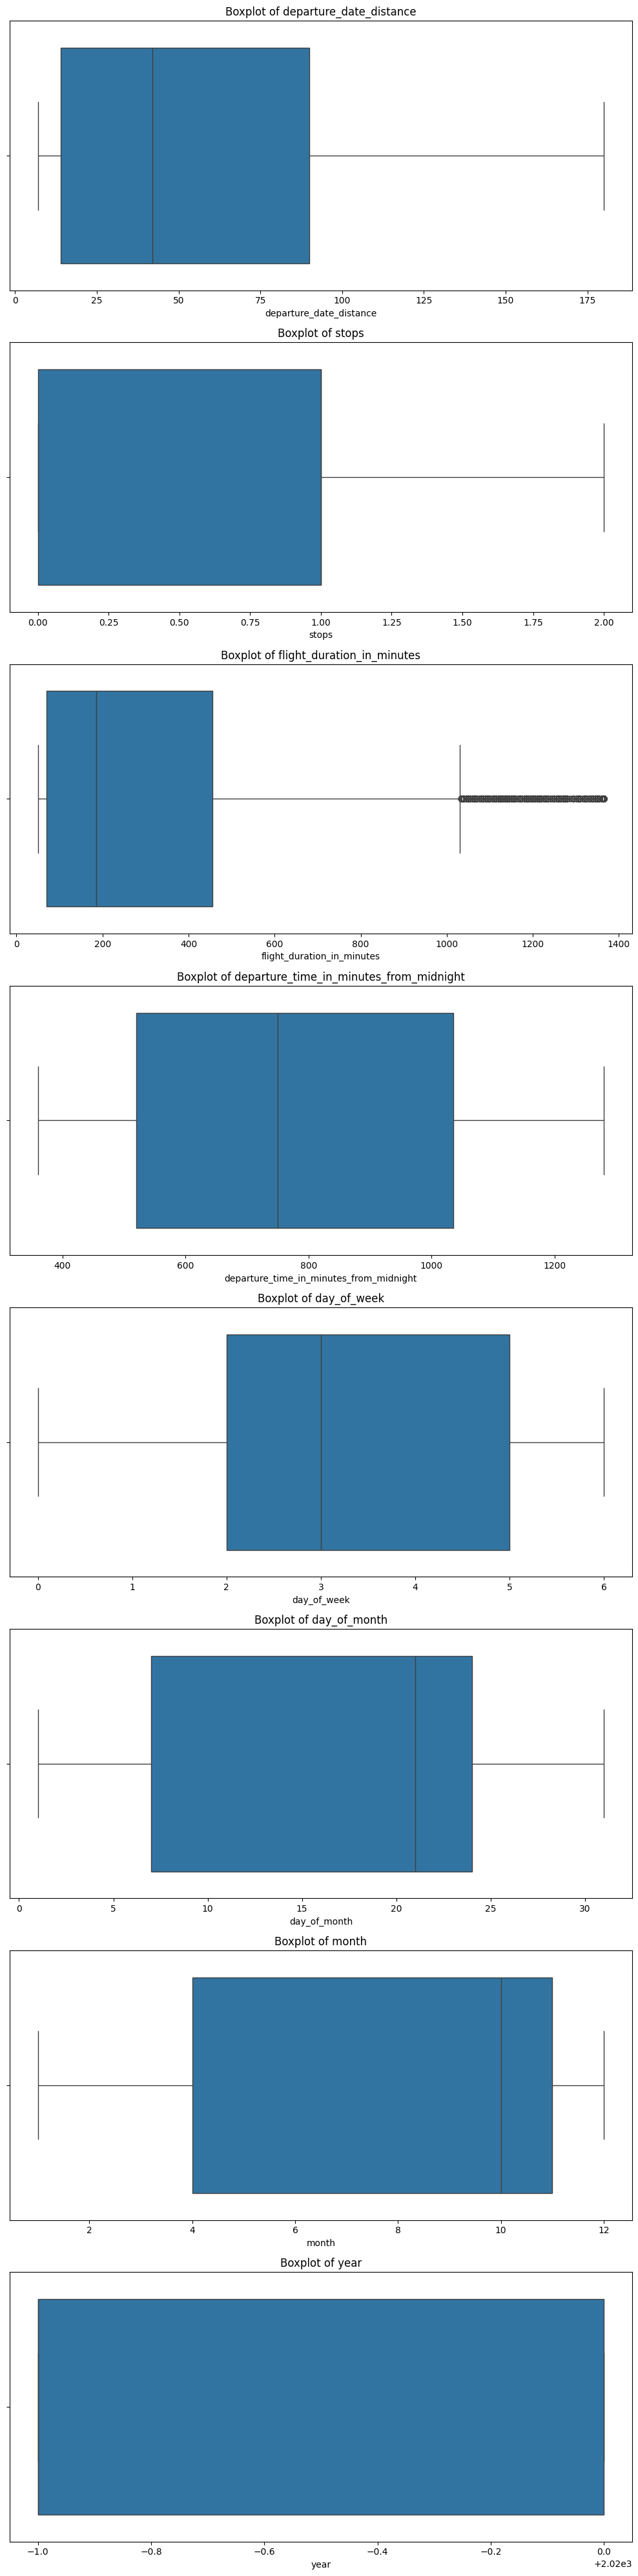

Total number of rows after outlier handling: 61822
Percentage of data retained after outlier handling: 100.00%


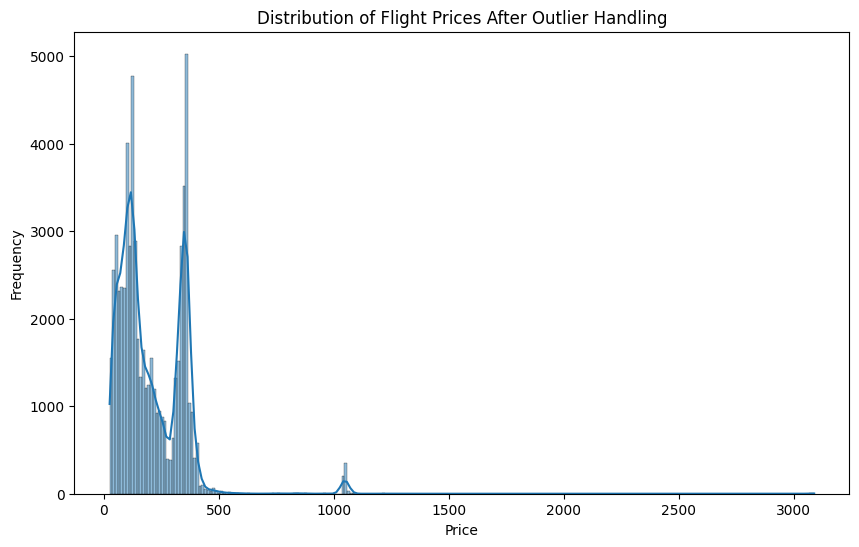

In [19]:
# Identify numerical columns (excluding date columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # get the list of numerical columns but exclude the 'price' column because it's the target
numerical_cols = [col for col in numerical_cols if 'price' not in col]  # exclude target columns because outliers in target columns may be valid data points and give valuable information

# Plot boxplots before outlier handling
print("Plotting boxplots before outlier handling...")
plot_boxplots(df, numerical_cols)

# Detect outliers
outliers = detect_outliers(df, numerical_cols)
print("Number of outliers in each column: ", outliers)
total_rows = len(df)  #total of rows before outlier handling
print(f"Total number of rows before outlier handling: {total_rows}")

# Handle outliers (here I'll use capping method). By setting the lower and upper bounds for each numerical column, if the value is below the 1st percentile or above the 99th percentile respectively, replace it with the corresponding bound. (lower bound for values below 1st percentile, upper bound for values above 99th percentile)
for col in numerical_cols:
    lower_bound = df[col].quantile(0.01)  # 1st percentile
    upper_bound = df[col].quantile(0.99)  # 99th percentile
    df[col] = df[col].clip(lower_bound, upper_bound)

# Plot boxplots after outlier handling
plot_boxplots(df, numerical_cols)


# Calculate and print the percentage of data retained after outlier handling
rows_after_outlier_handling = len(df)  #total of rows after outlier handling
print(f"Total number of rows after outlier handling: {rows_after_outlier_handling}")
percentage_retained = (rows_after_outlier_handling / total_rows) * 100  #calculate the percentage of data retained

print(f"Percentage of data retained after outlier handling: {percentage_retained:.2f}%")

#the distribution of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)  # create a histogram of the 'price' column (with kernel density estimation)
plt.title('Distribution of Flight Prices After Outlier Handling')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Show the information of the dataset after handling the outliers

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61822 entries, 0 to 62625
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   departure_city                           61822 non-null  object  
 1   arrival_city                             61822 non-null  object  
 2   departure_date_distance                  61822 non-null  int64   
 3   airline                                  61822 non-null  object  
 4   stops                                    61822 non-null  int64   
 5   price                                    61822 non-null  float64 
 6   flight_duration_in_minutes               61822 non-null  int64   
 7   departure_time_in_minutes_from_midnight  61822 non-null  int64   
 8   day_of_week                              61822 non-null  int32   
 9   day_of_month                             61822 non-null  int32   
 10  month                                  

### Analyze and Visualize data

#### Display the distribution of flight duration using **box plot**

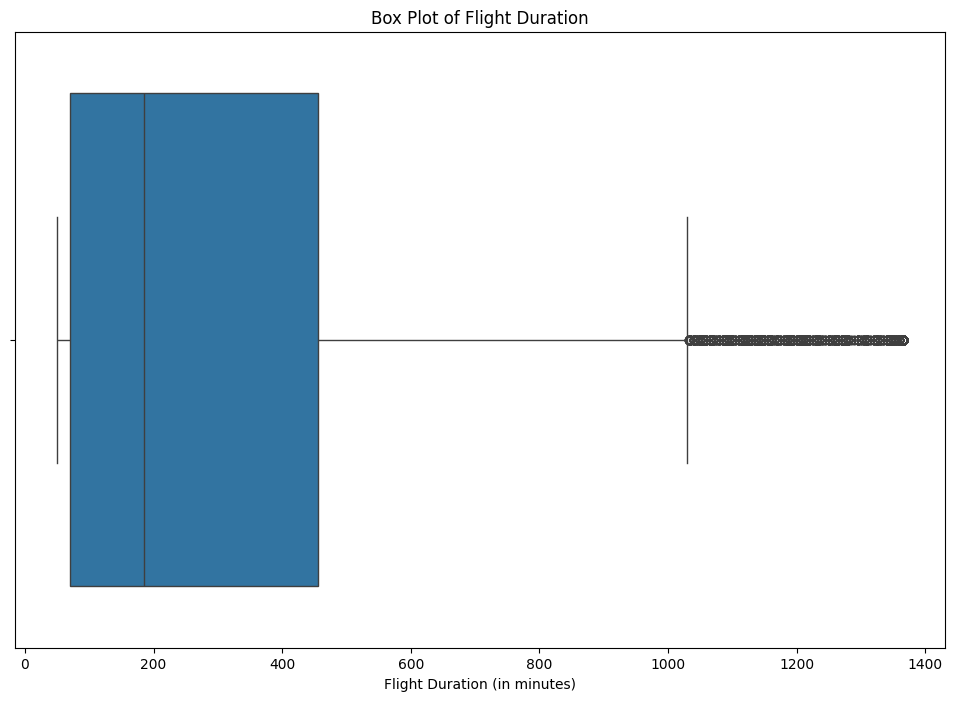

In [21]:
# The distribution of flight duration
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['flight_duration_in_minutes'])
plt.title('Box Plot of Flight Duration')
plt.xlabel('Flight Duration (in minutes)')
plt.show()

### Linear correlation between numerical attributes using **heat map**

<Axes: >

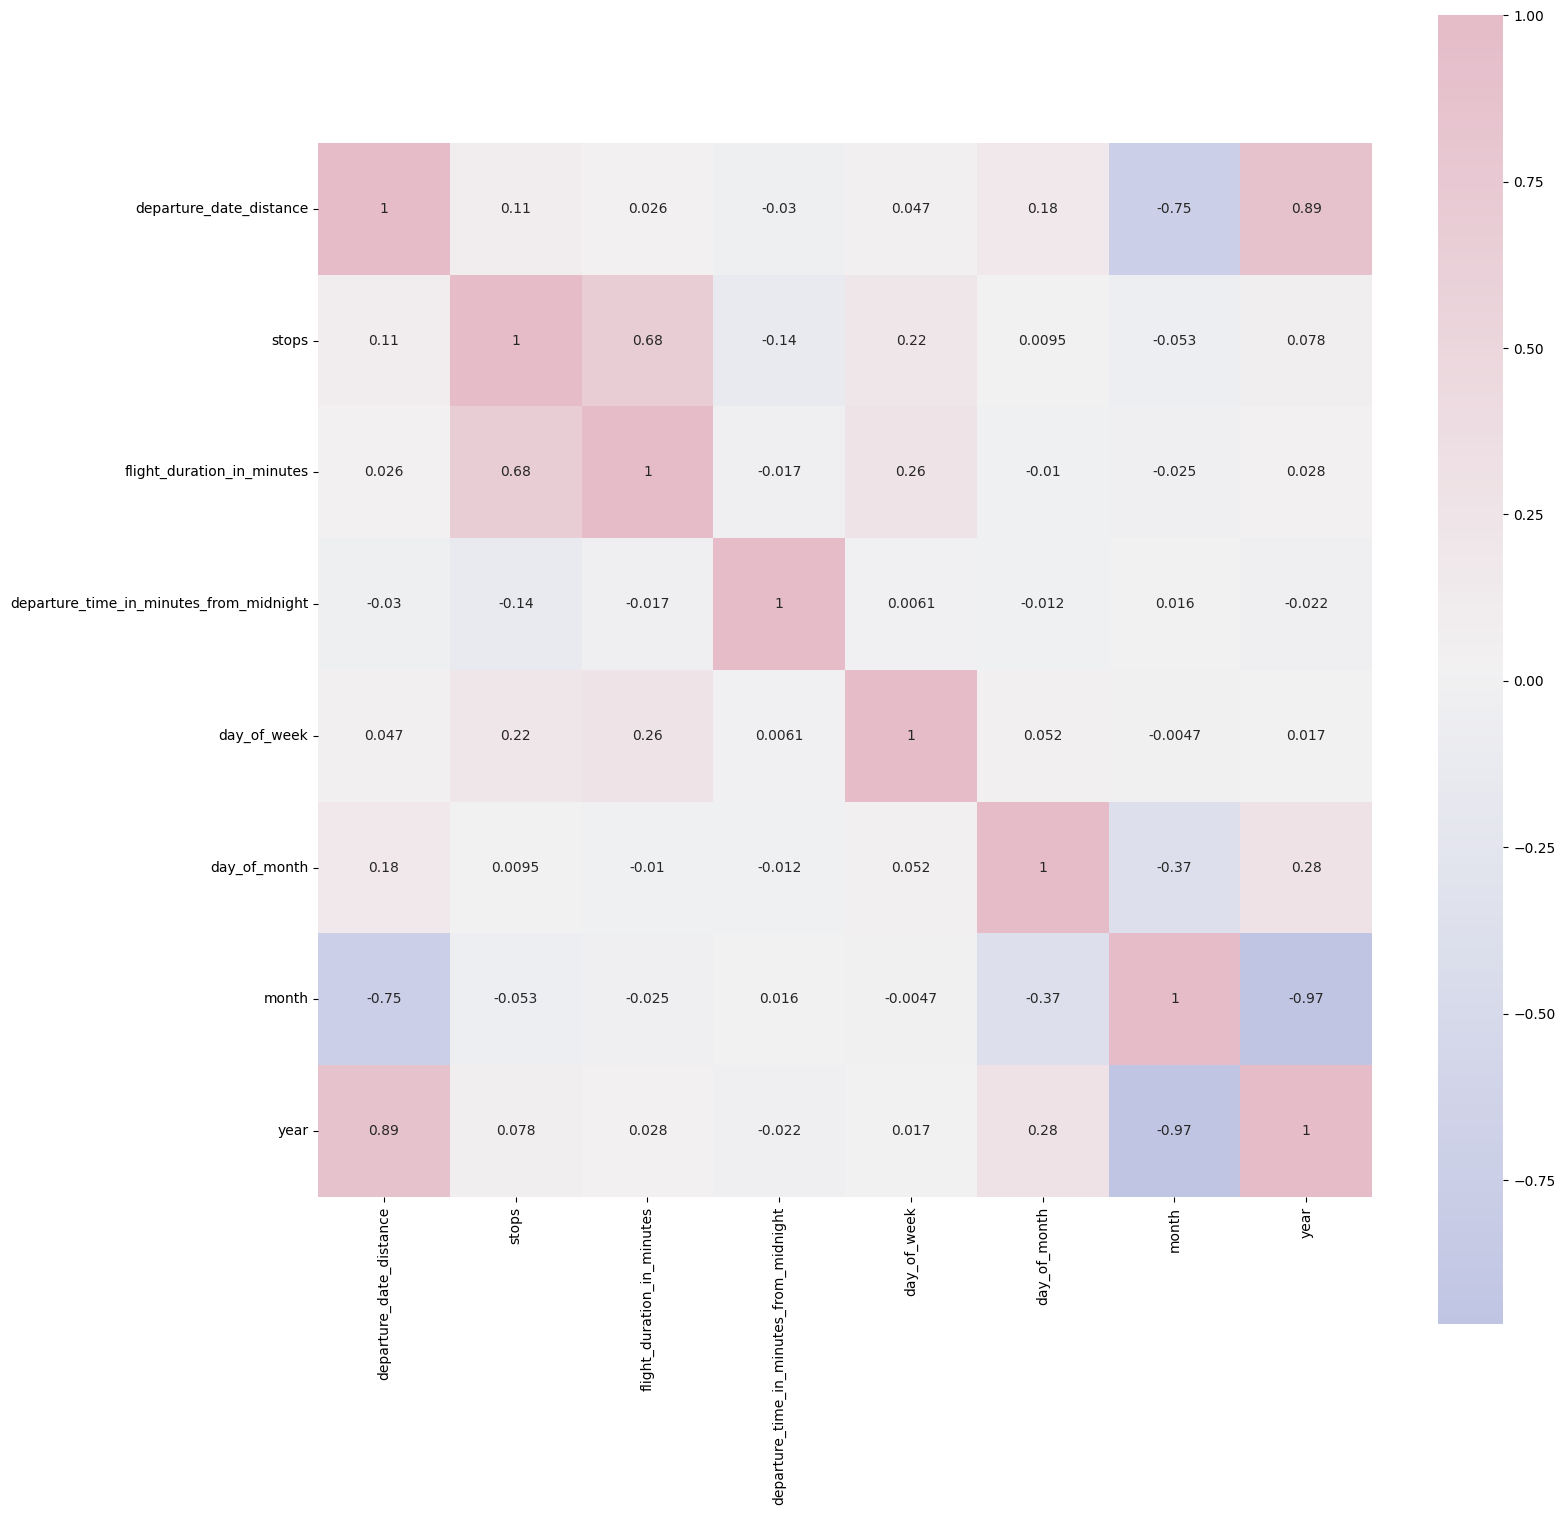

In [22]:
# linear correlation between numerical attributes
# [col for col in df.columns if df[col].dtype=="int"]
correlation = df.select_dtypes(include=["int"]).corr()
color_map = sns.diverging_palette(260,-10,s=50, l=80, n=6, as_cmap=True)
plt.subplots(figsize=(17,17))
sns.heatmap(correlation,cmap= color_map,annot=True, square=True)

### Distribution of the flight price using **histogram plot**

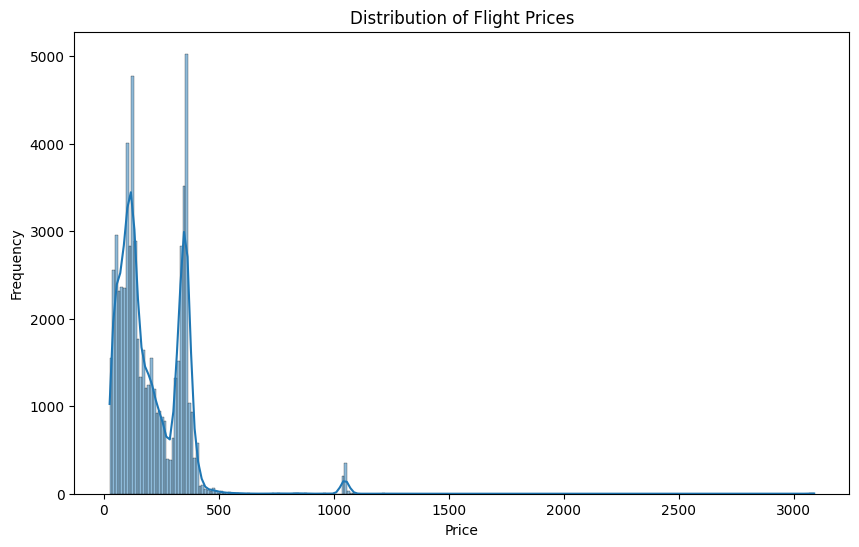

In [23]:
#distribution of the flight price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Flight prices by airline using **box plot**

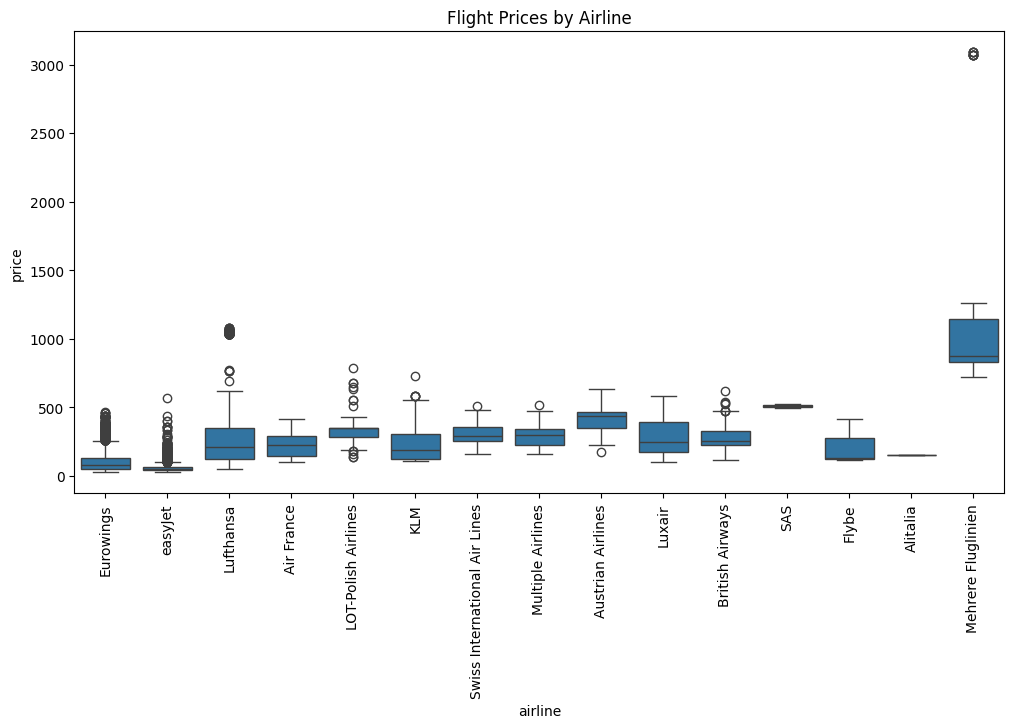

In [24]:
# Box plot of prices by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Flight Prices by Airline')
plt.xticks(rotation=90)  #rotate the x-axis labels by 90 degrees and set the labels to the airline names
plt.show()

###  Relationship between flight price vs. flight duration using **scatter plot**

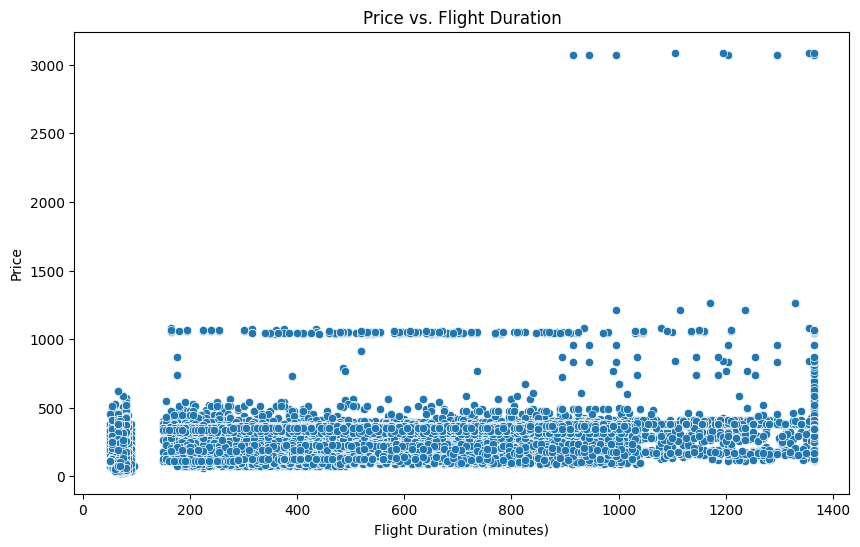

In [25]:
# Scatter plot of price vs. flight duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flight_duration_in_minutes', y='price', data=df)
plt.title('Price vs. Flight Duration')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')
plt.show()

### Flight Price based on Airline using **bar chart**

<Axes: xlabel='airline'>

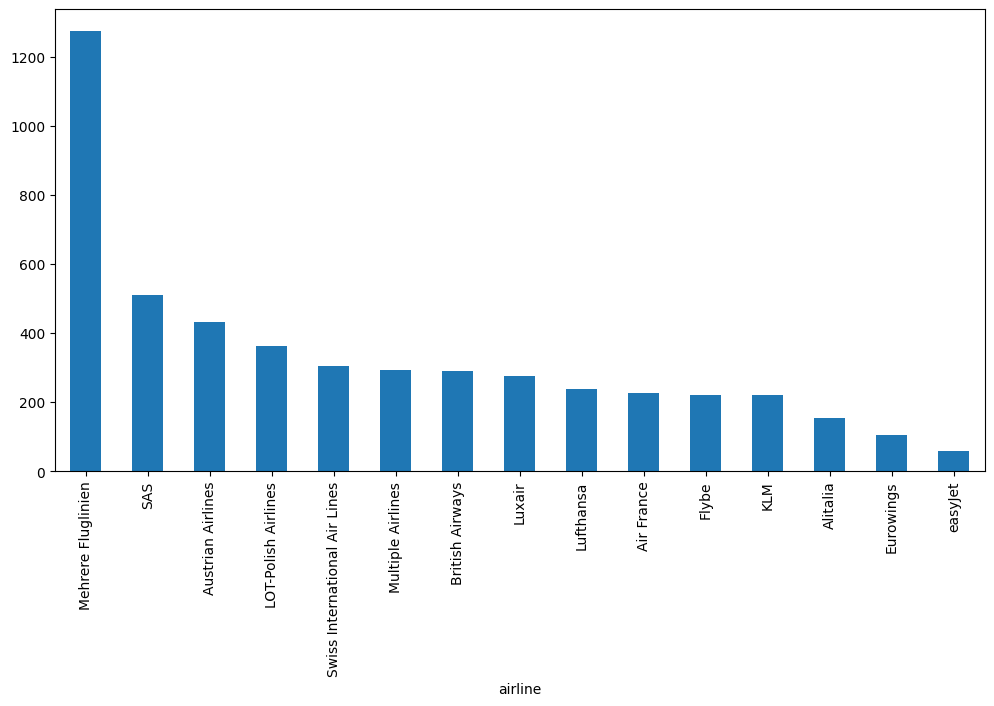

In [26]:
# Analyze Airline vs Price
df.groupby('airline')['price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))

### Average price by year using **bar chart**

<Axes: xlabel='year'>

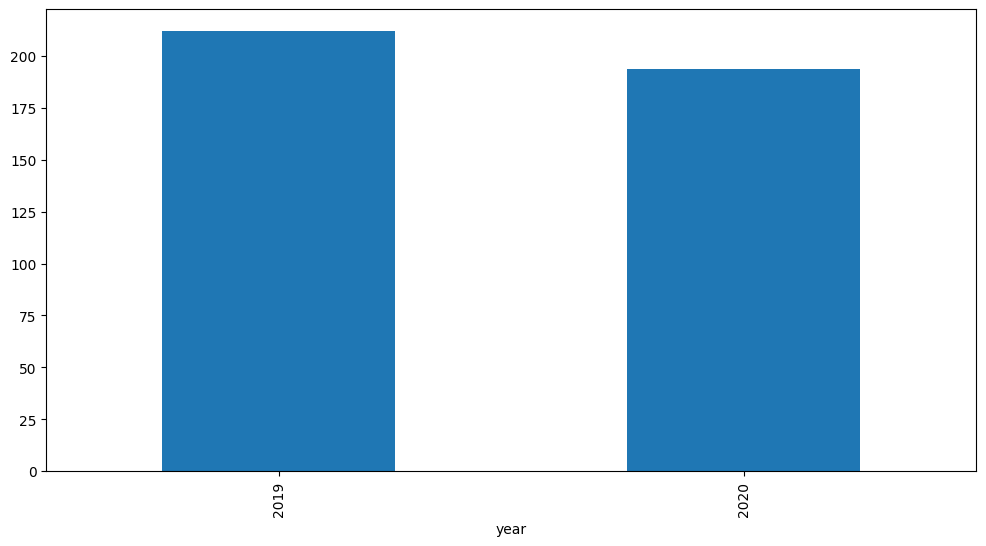

In [27]:
# average price by year
df.groupby('year')['price'].mean().plot(kind='bar', figsize=(12, 6))


### Price Trends Over Time using **line chart**

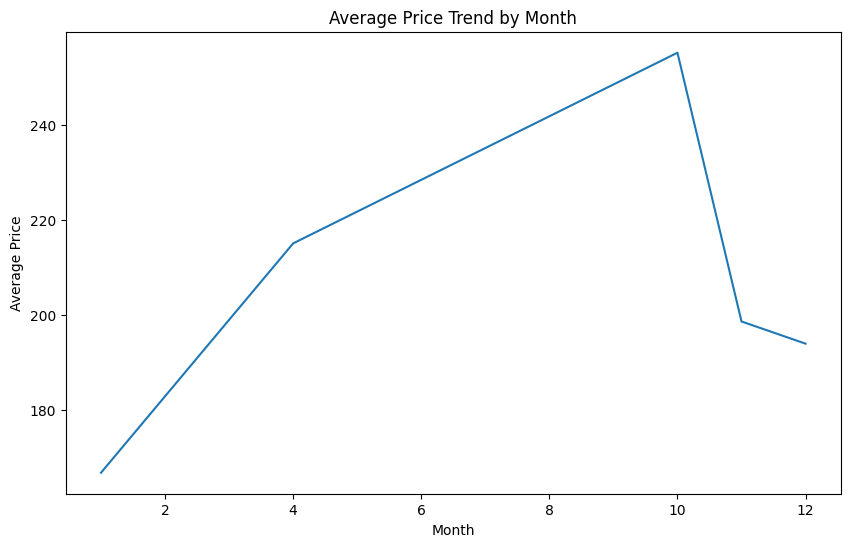

In [28]:
# Price Trends Over Time
monthly_avg_price = df.groupby('month')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='price', data=monthly_avg_price)
plt.title('Average Price Trend by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

### Analyze how many flights are there for each day of the week using **bar chart**

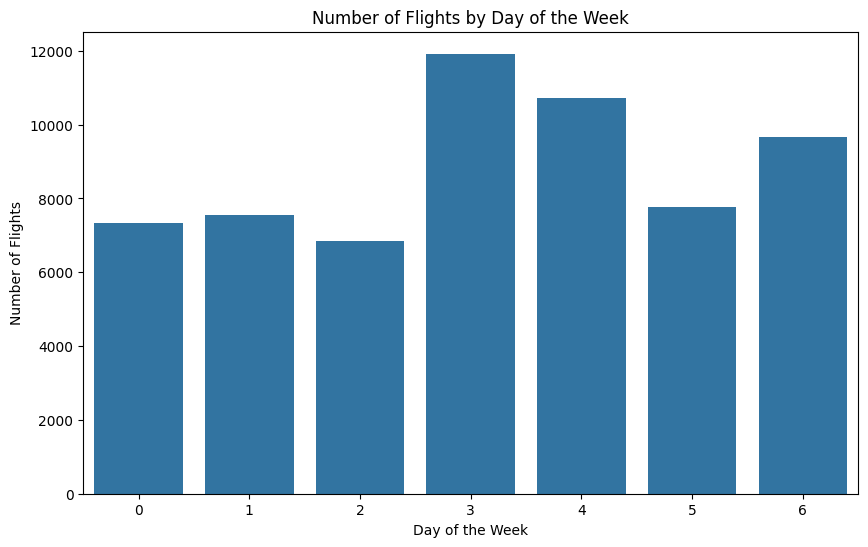

In [29]:
# How many flights are there for each day of the week?
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df)
plt.title('Number of Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.show()


### Analyze the relationship between the day of the week vs price using **bar chart** (monday is 0, sunday is 6)

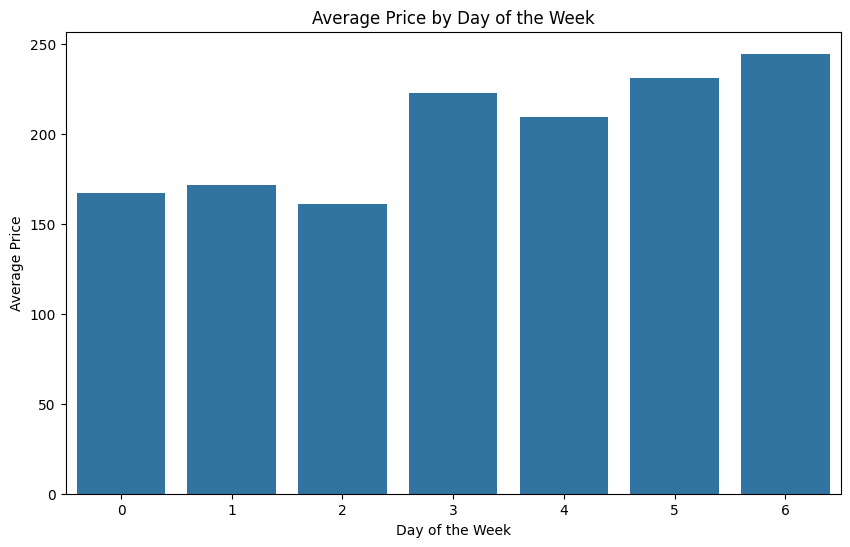

In [30]:
# day of the week vs price (monday is 0, sunday is 6)
day_of_the_week_avg_price = df.groupby('day_of_week')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='price', data=day_of_the_week_avg_price)
plt.title('Average Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.show()


### Analyze the average price by departure city and arrival city using **bar chart**

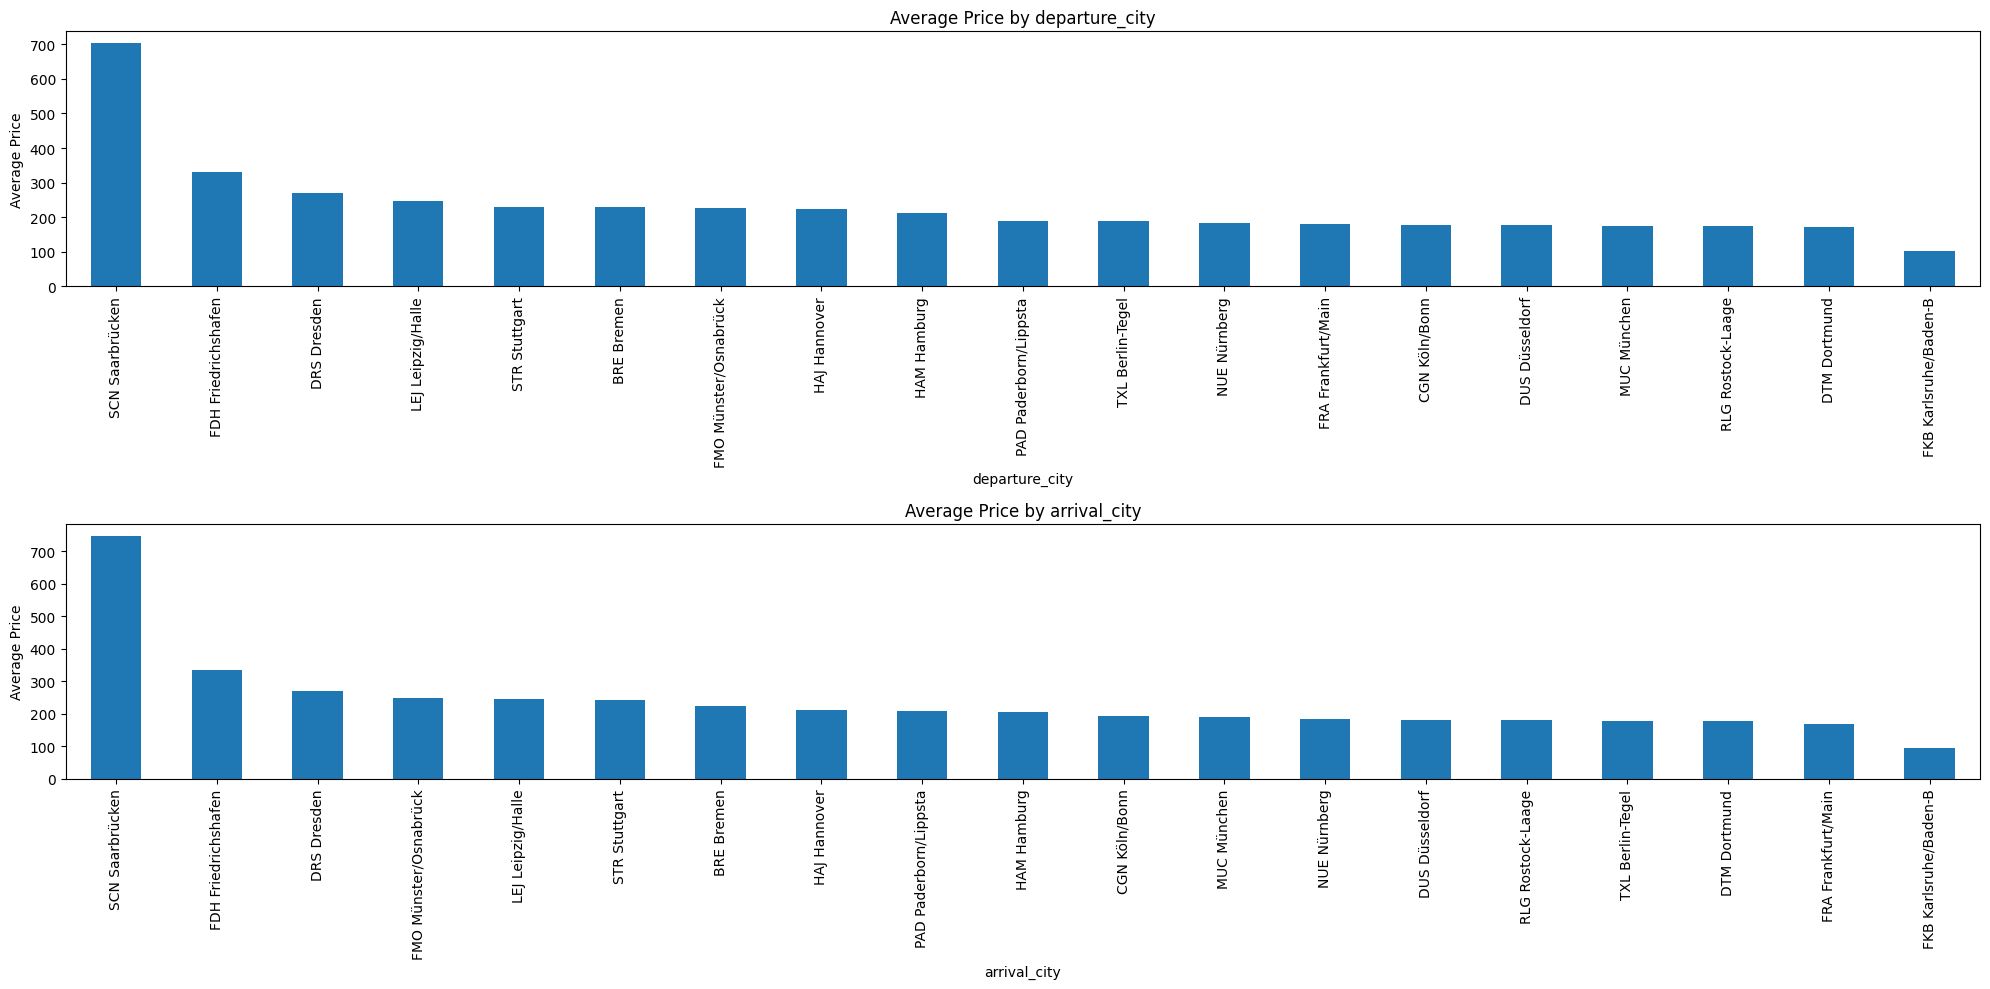

In [31]:
# Analyze the average price by departure city and arrival city
cities: list[str] = ['departure_city', 'arrival_city']
fig, axes = plt.subplots(2,1,figsize=(20, 10))
for i, city in enumerate(cities):
    avg_prices = df.groupby(city)['price'].mean().sort_values(ascending=False)
    avg_prices.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Average Price by {city}')
    axes[i].set_xlabel(city)
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x',rotation = 90)
plt.tight_layout()
plt.show()


### Analzye the price distribution by number of stops using **violin plot**

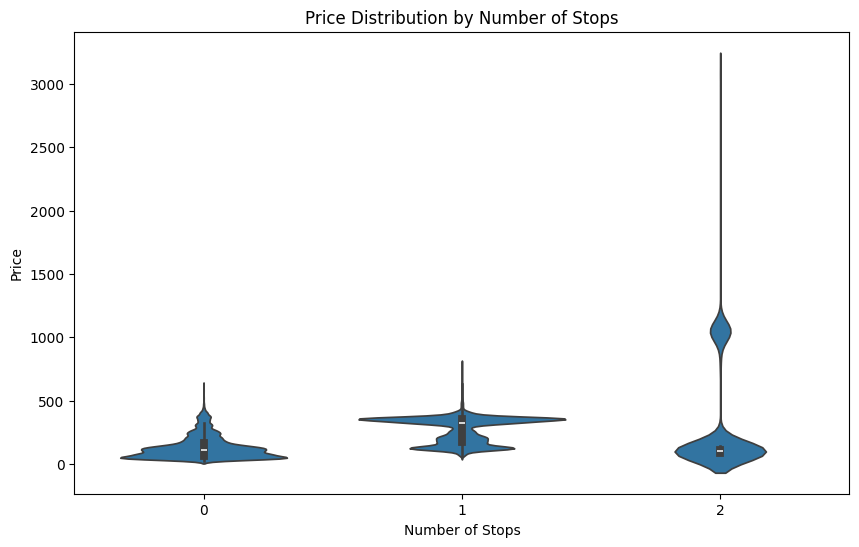

In [32]:
#Price Distribution by Number of Stops
plt.figure(figsize=(10, 6))
sns.violinplot(x='stops', y='price', data=df)
plt.title('Price Distribution by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

### Price vs Days Before Flight using **scatter plot**

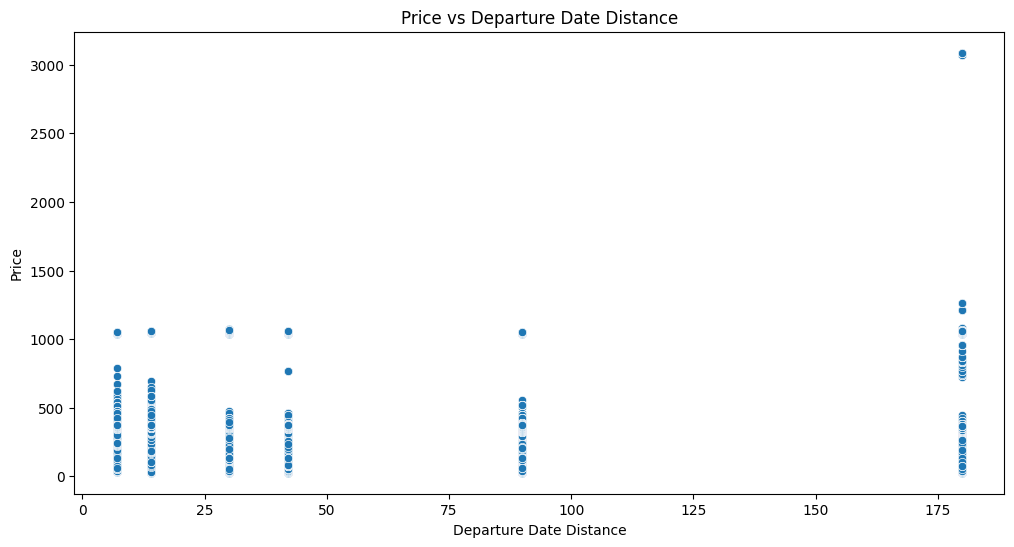

In [33]:
#Price vs Days Before Flight
plt.figure(figsize=(12, 6))
sns.scatterplot(x='departure_date_distance', y='price', data=df)
plt.title('Price vs Departure Date Distance')
plt.xlabel('Departure Date Distance')
plt.ylabel('Price')
plt.show()

### Analyze the price based on the `departure_city` using **box plot**

<Axes: xlabel='departure_city', ylabel='price'>

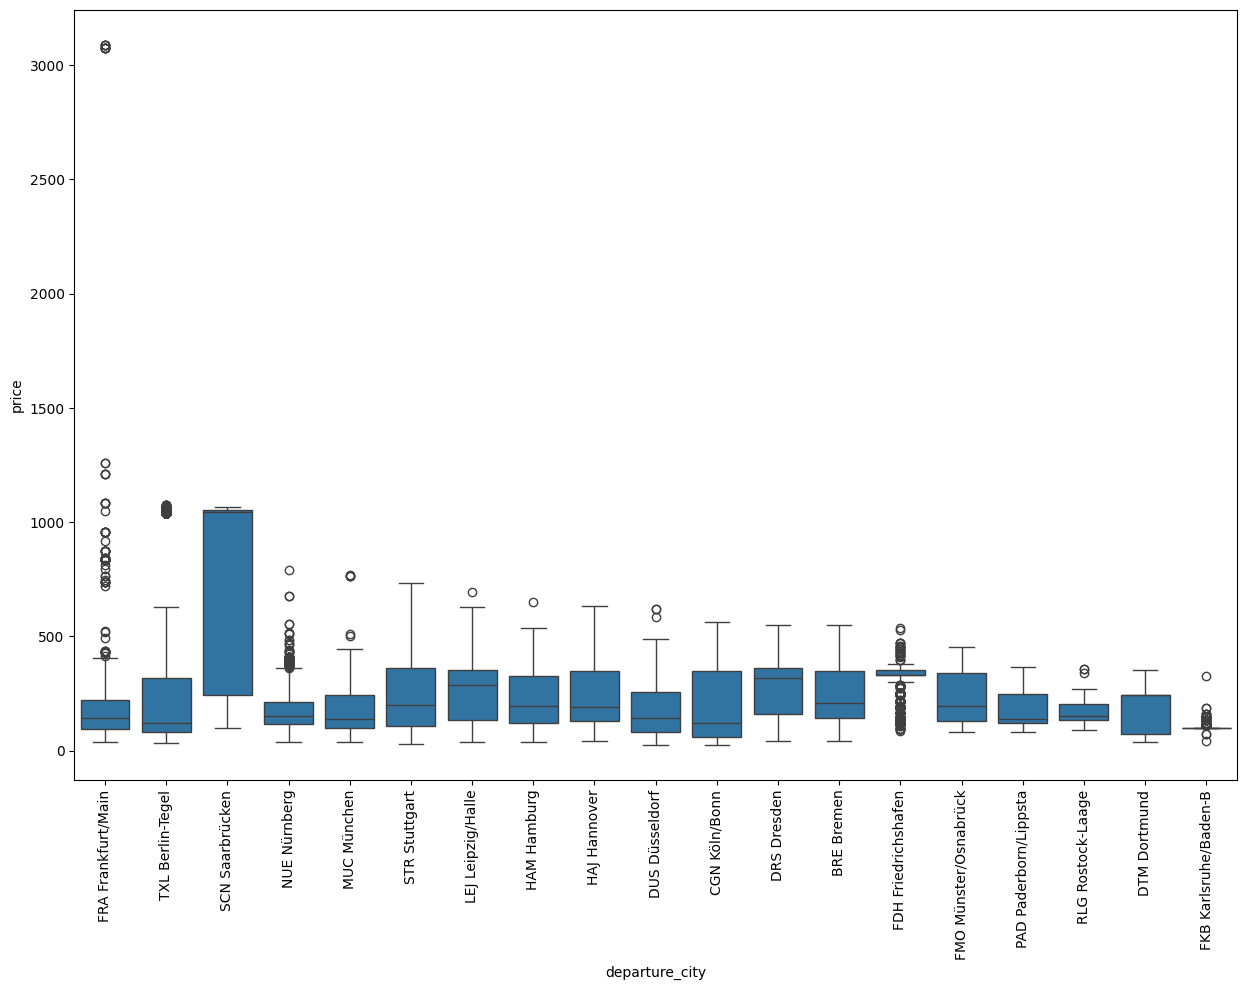

In [34]:
# the departure_city vs price
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x='departure_city', y='price', data=df.sort_values('price', ascending=False))

### Analyze the price based on the `arrival_city` using **box plot**

<Axes: xlabel='arrival_city', ylabel='price'>

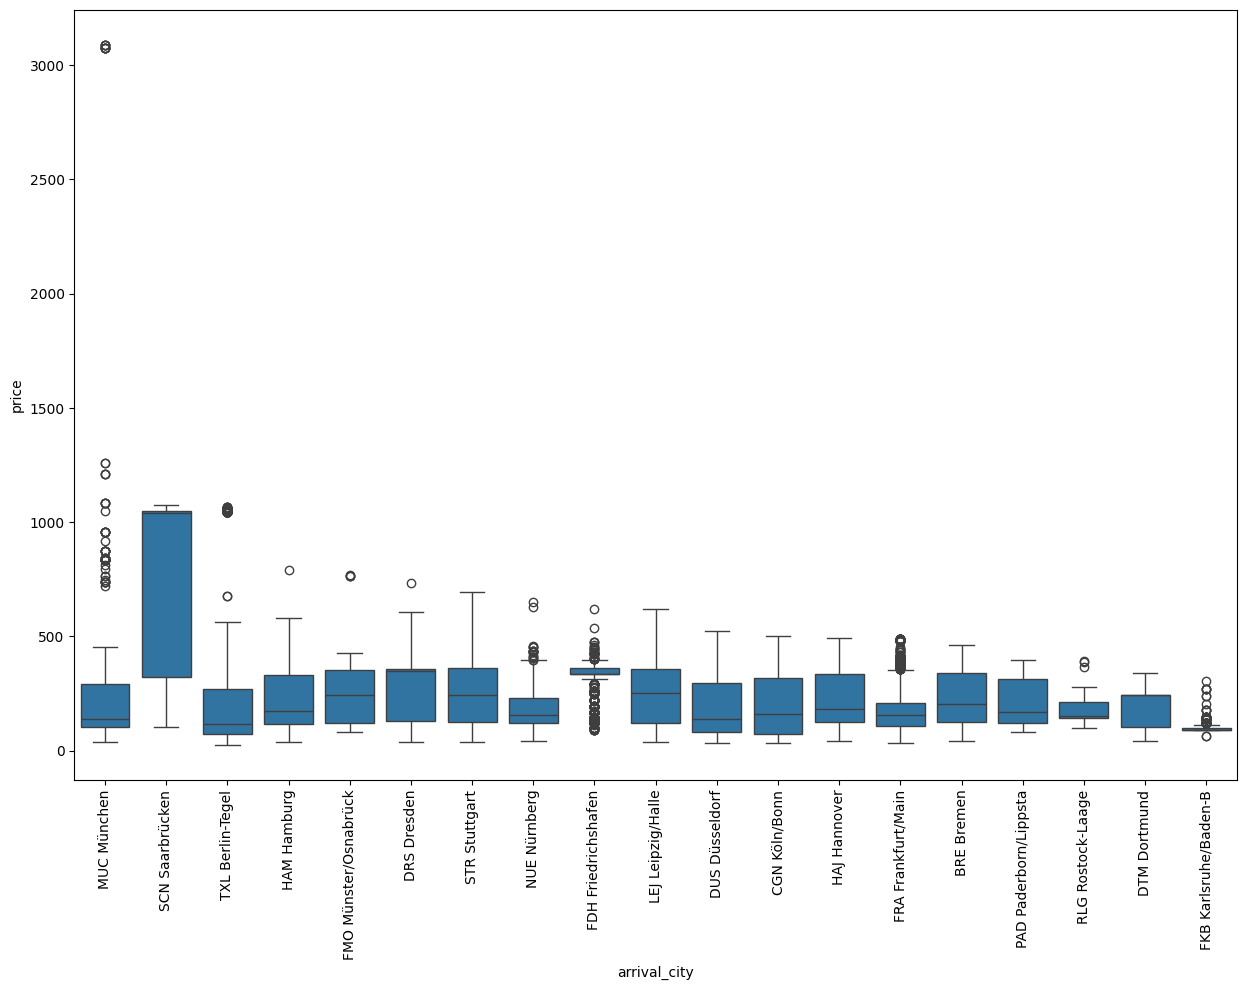

In [35]:
# arrival_city vs price
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x='arrival_city', y='price', data=df.sort_values('price', ascending=False))

### Display **Pair Plot** for All Key Features

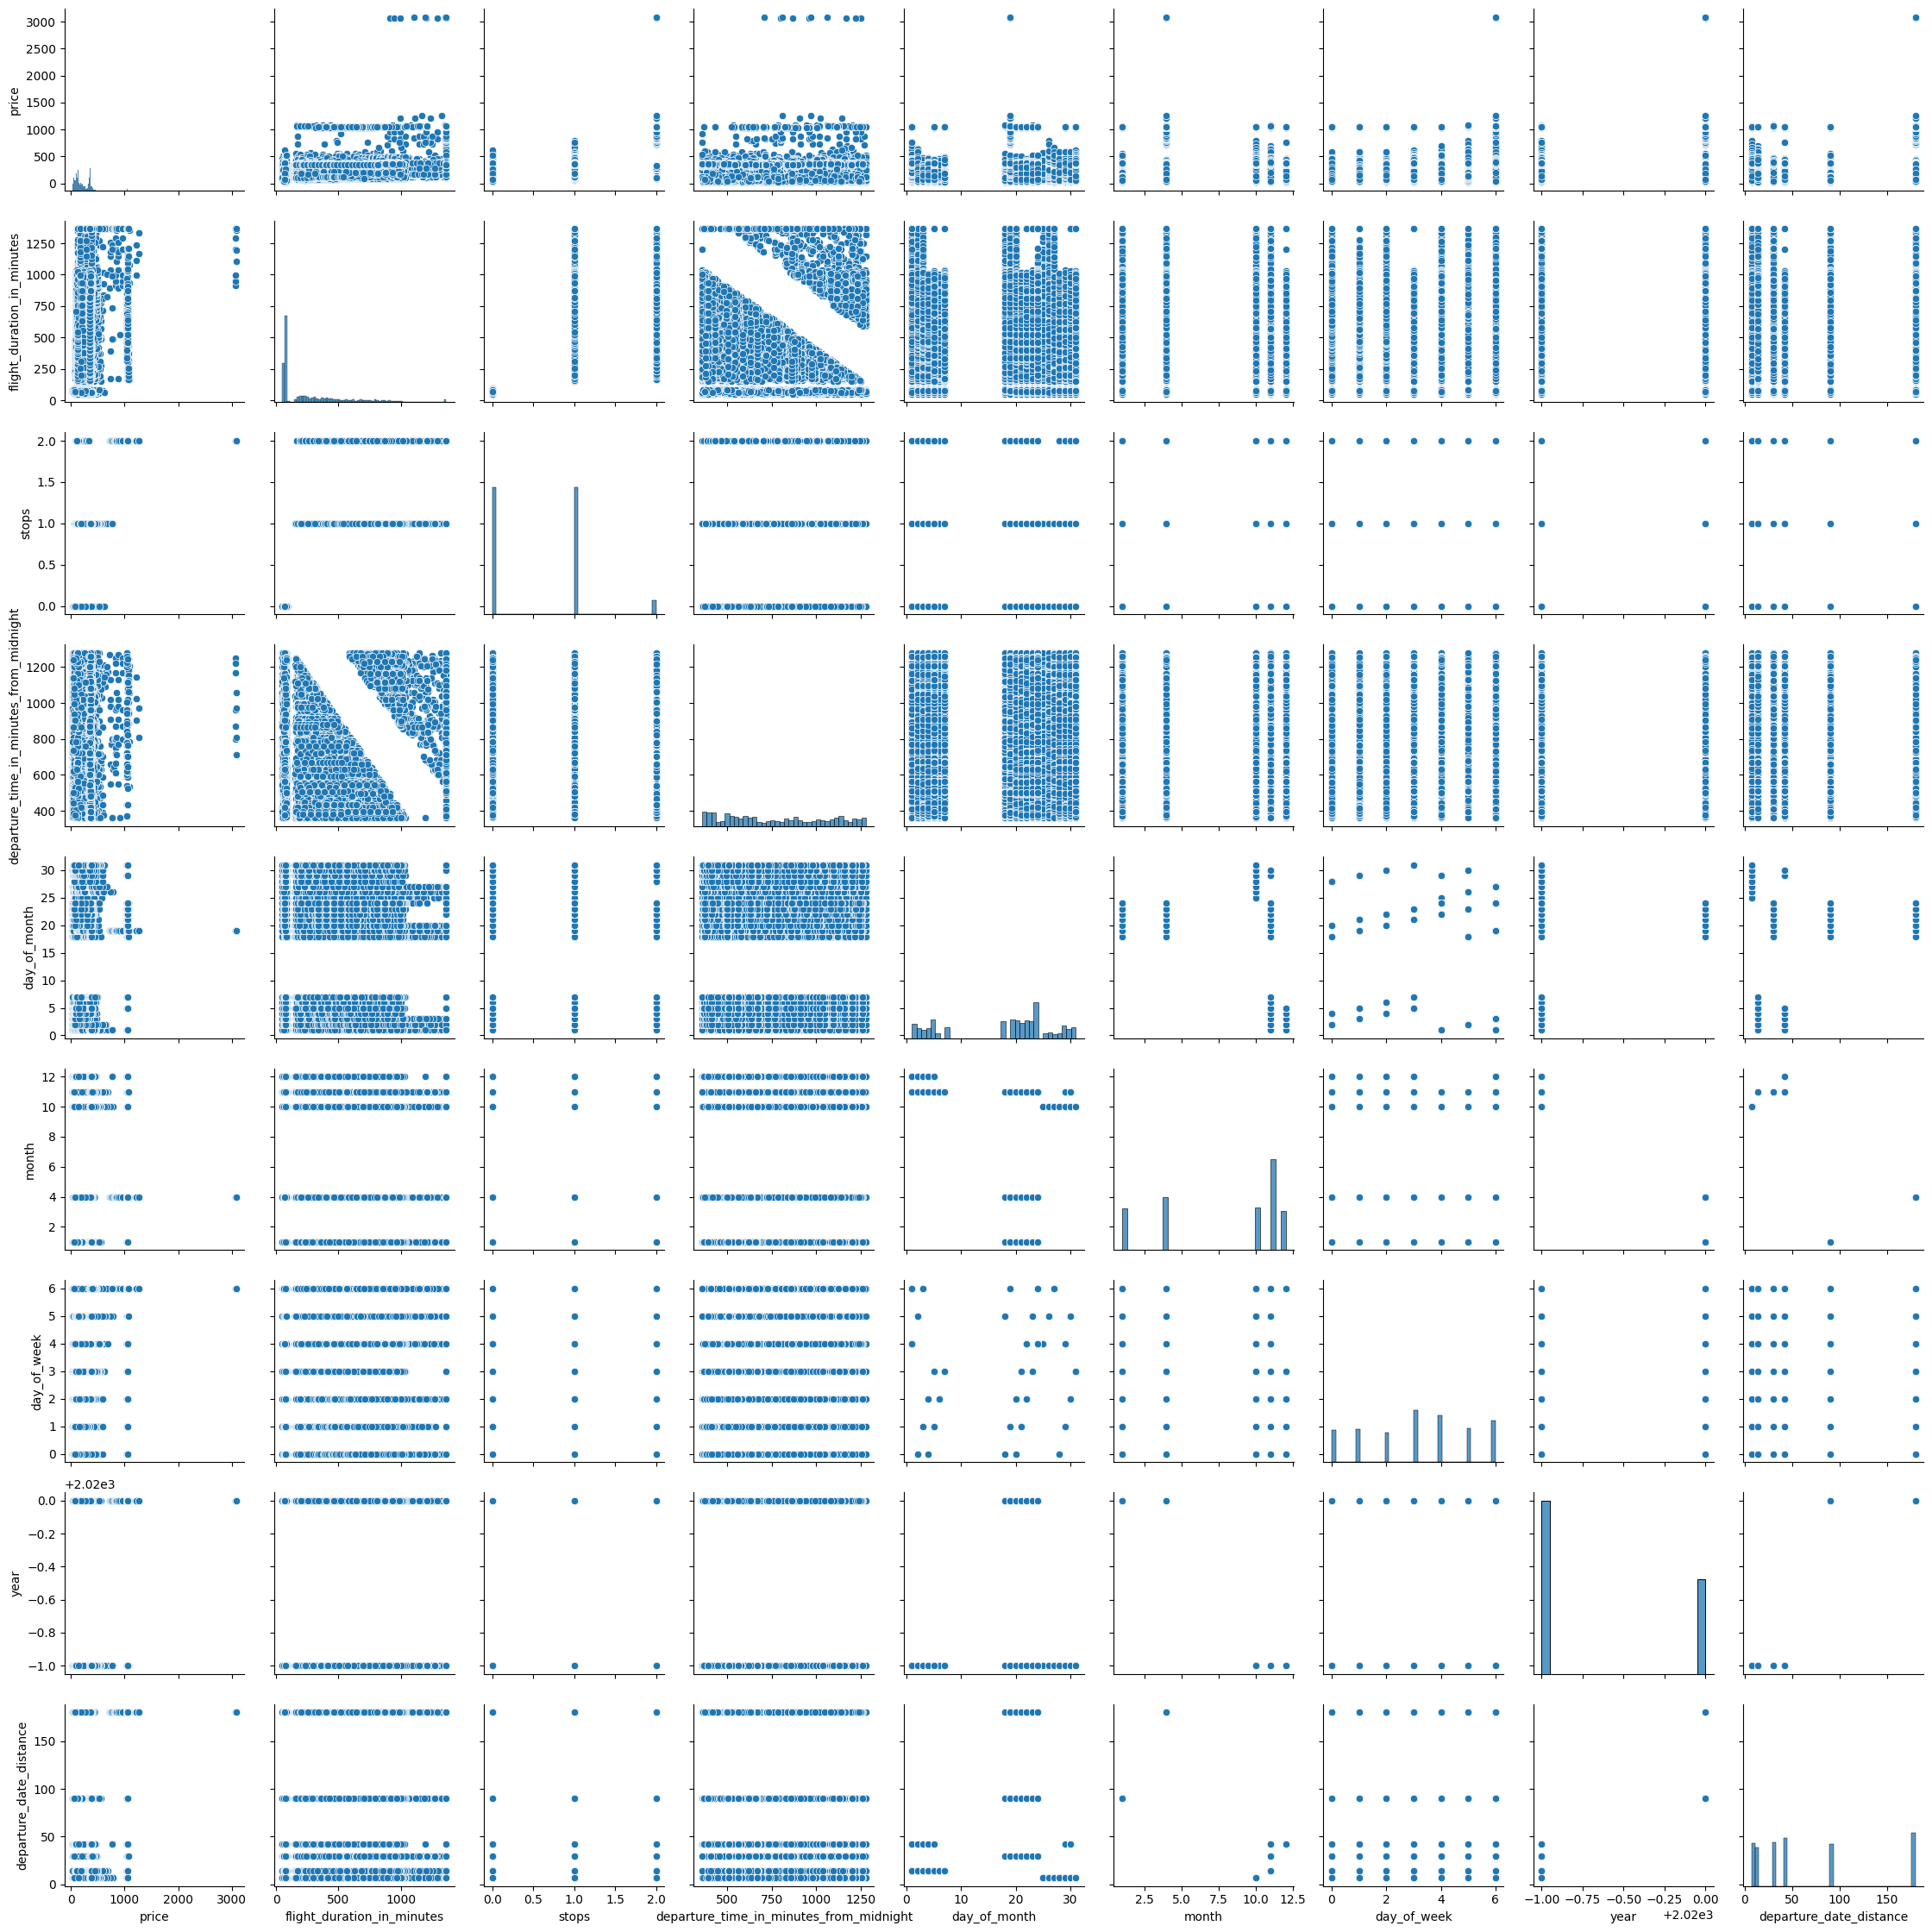

In [36]:
#Pair Plot for Key Features
key_features = ['price', 'flight_duration_in_minutes', 'stops', 'departure_time_in_minutes_from_midnight', 'day_of_month', 'month', 'day_of_week', 'year', 'departure_date_distance']
sns.pairplot(df[key_features], height=2.5)
plt.tight_layout()
plt.show()

### **Bar plot** for displaying the distribution of price categories

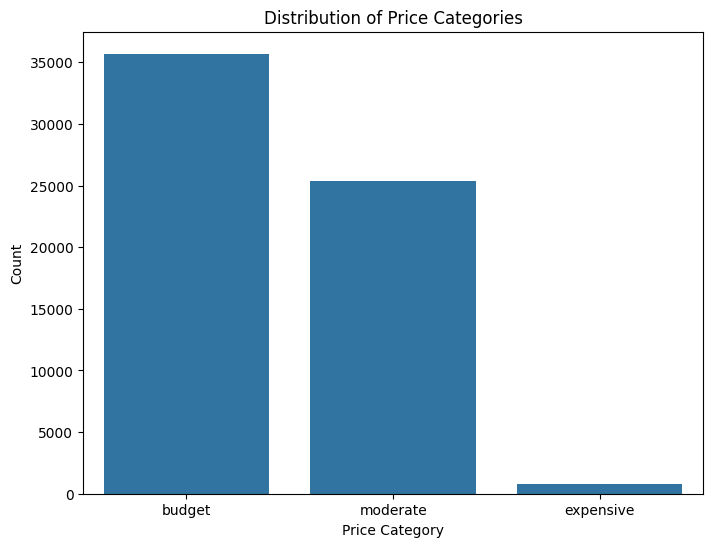

In [37]:
# Bar plot of price categories
plt.figure(figsize=(8, 6))
sns.countplot(x='price_category', data=df)
plt.title('Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

### Flight Duration Distribution by Price Category using **box plot**

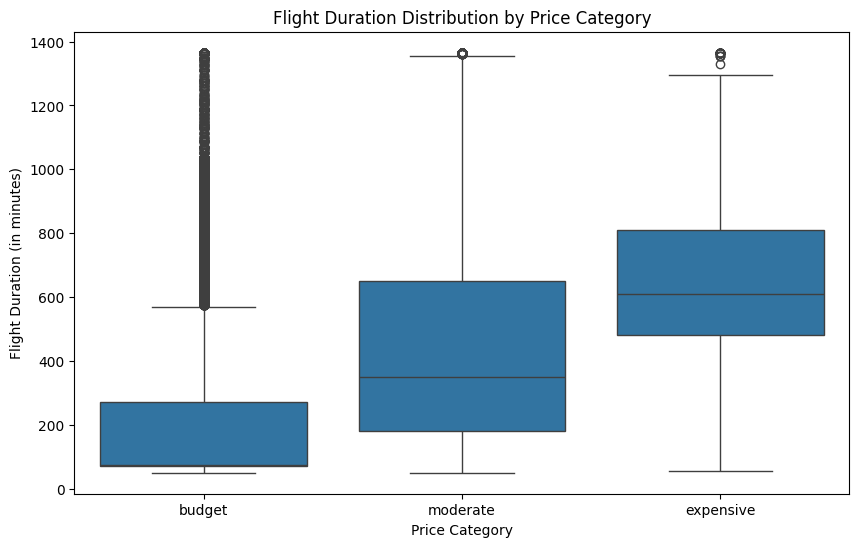

In [38]:
#Flight Duration Distribution by Price Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_category', y='flight_duration_in_minutes', data=df)
plt.title('Flight Duration Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Flight Duration (in minutes)')
plt.show()

### Display the summarized statistics using `describe()` function

In [39]:
#Statistical Summary
summary = df.describe()
print("Statistical Summary of Numerical Features:")
print(summary)

Statistical Summary of Numerical Features:
       departure_date_distance         stops         price  \
count             61822.000000  61822.000000  61822.000000   
mean                 65.230161      0.579923    205.222008   
std                  62.578653      0.592062    148.781235   
min                   7.000000      0.000000     26.000000   
25%                  14.000000      0.000000    100.000000   
50%                  42.000000      1.000000    160.000000   
75%                  90.000000      1.000000    332.000000   
max                 180.000000      2.000000   3088.000000   

       flight_duration_in_minutes  departure_time_in_minutes_from_midnight  \
count                61822.000000                             61822.000000   
mean                   303.063699                               774.855505   
std                    303.358521                               285.184848   
min                     50.000000                               360.000000   
25%     

## Data Spliting, Scaling and Encoding

### Data Splitting
In this section, data is being prepared for modelling and training by:
1. Separating features and target variables:
    - Features (X): All columns except `price` and `price_category`
    - Regression target (y): `price`
    - Classification target (z): `price_category`
2. Splitting the data into training and testing sets:
    - Using `train_test_split()` to split data with a 80% for training and 20% for testing.
    - Creating separate splits for regression and classification tasks.

By executing the below cell, I have created separate datasets for:
 - Regression: Predicting the exact price
 - Classification: Predicting the price category


In [40]:
# Separate features and target
X = df.drop(columns=['price', 'price_category'], axis=1)  # enforce exclusive the target variable
y =df['price']  # target variable for regression
z = df['price_category']  # target variable for classification

# split the data for regression model
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X, y, test_size=0.20, random_state=9214)
# split the data for classification model
X_train_cl, X_test_cl, z_train_cl, z_test_cl = train_test_split(X, z, test_size=0.20, random_state=9214)

### Visualize the distribution of numerical column to find out the best scaling method using **bar chart**

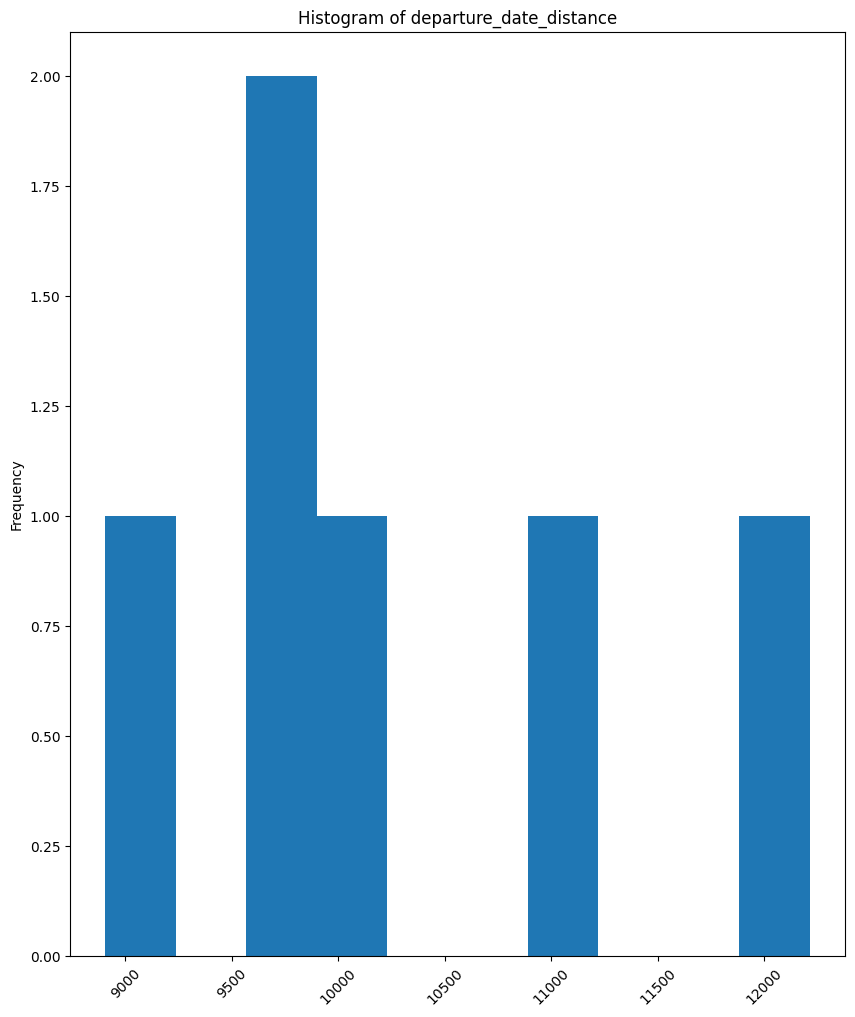

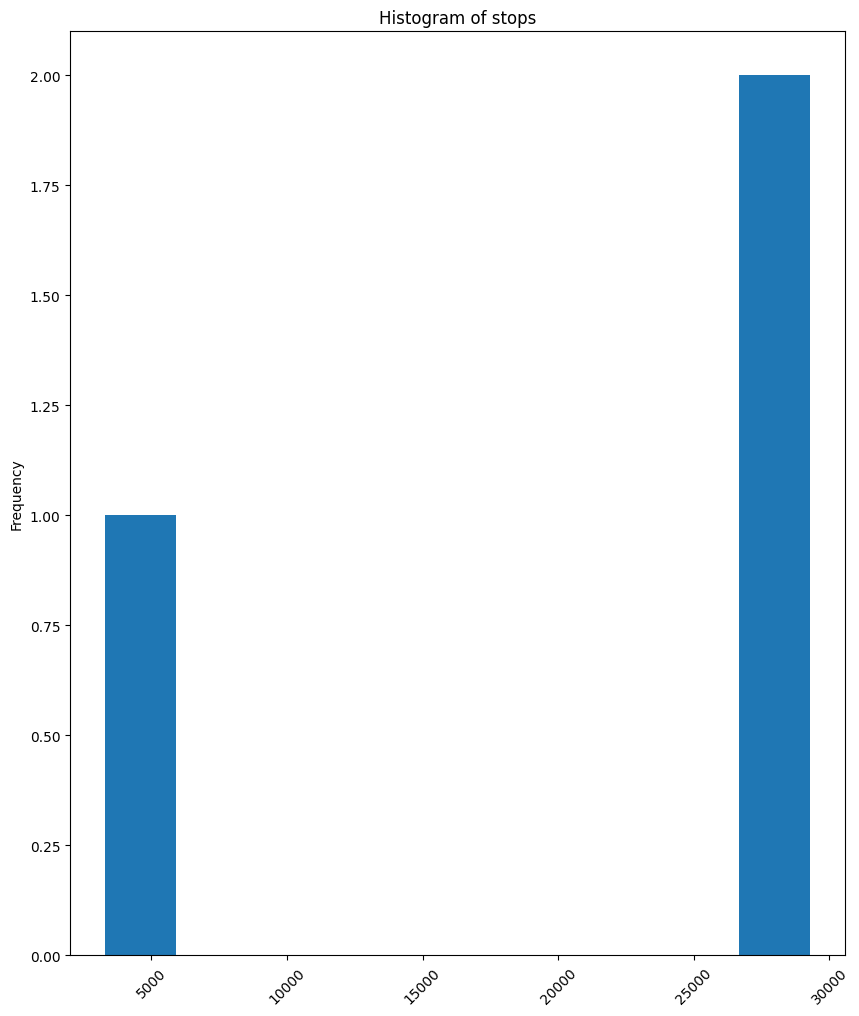

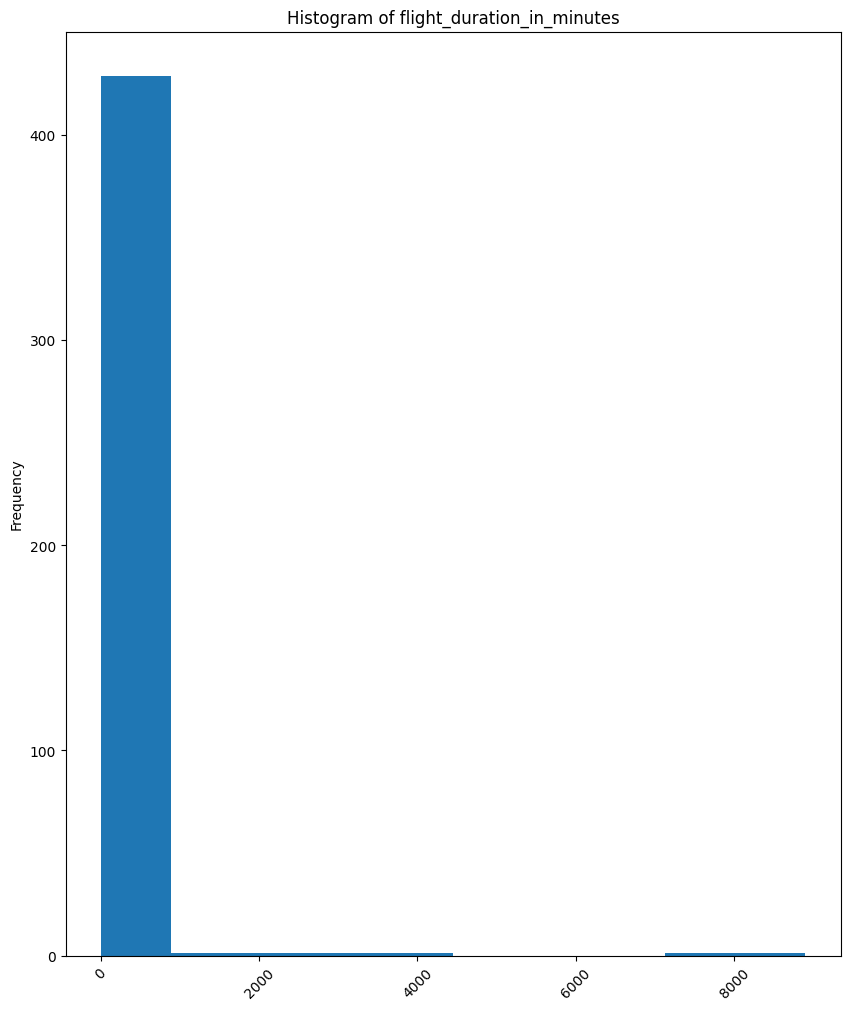

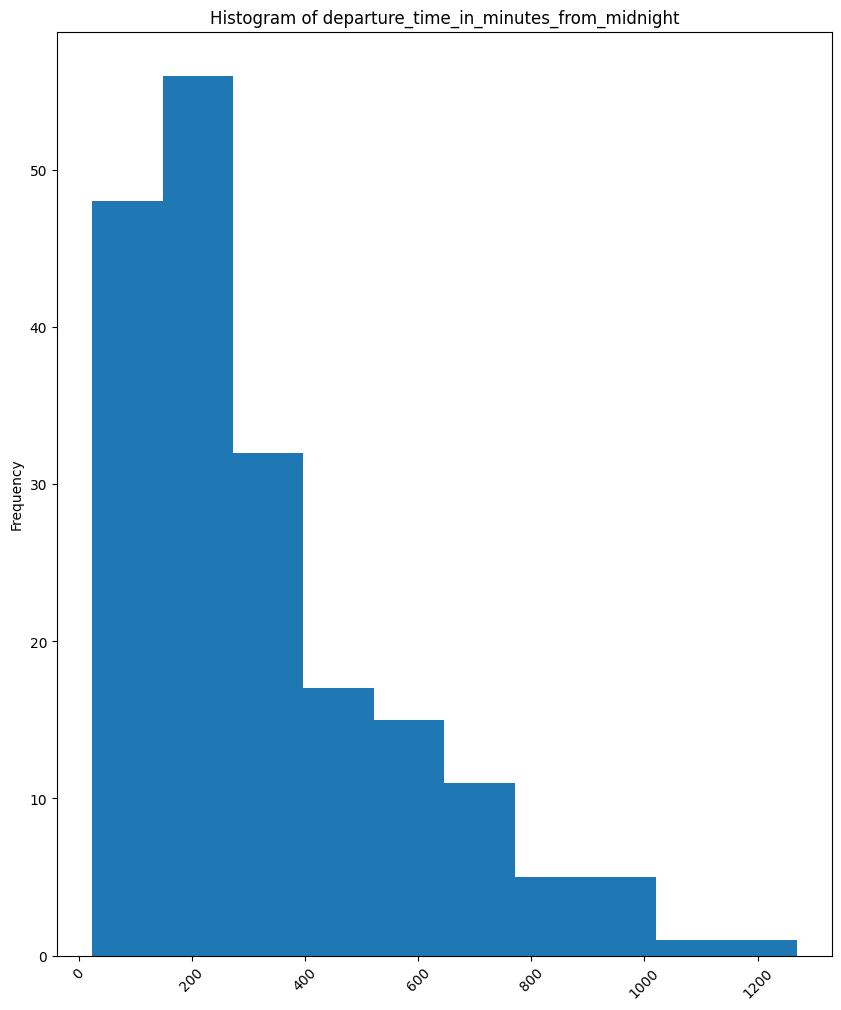

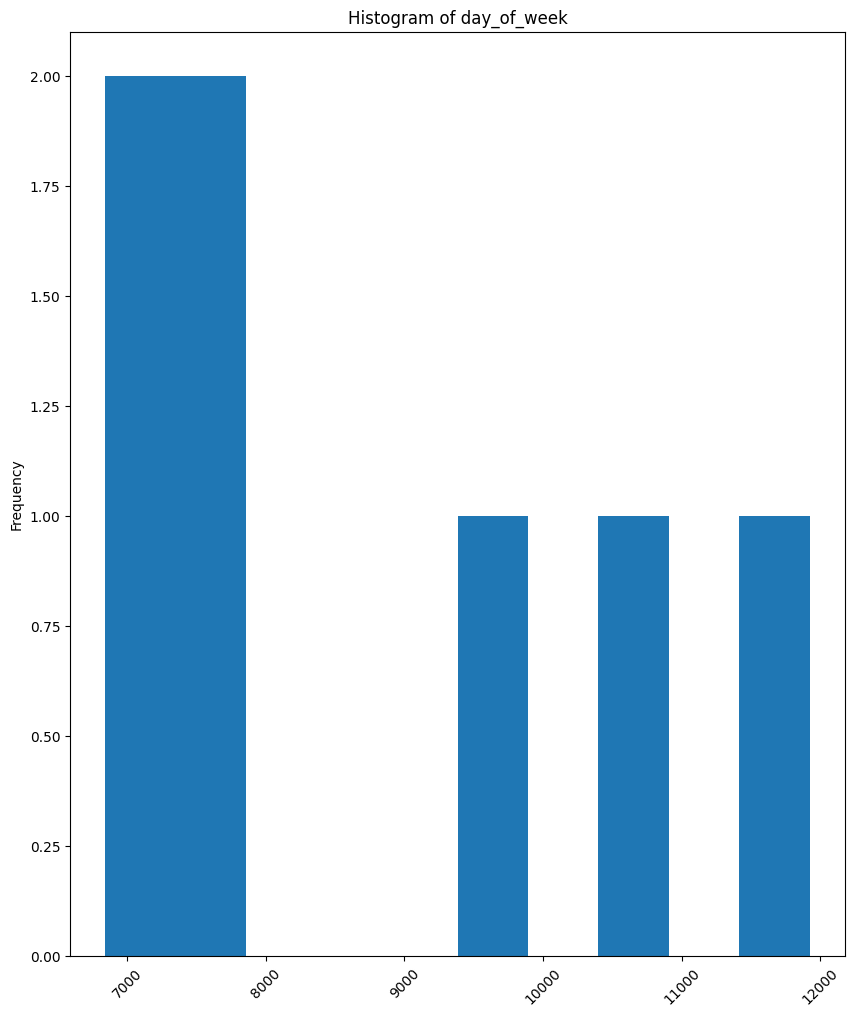

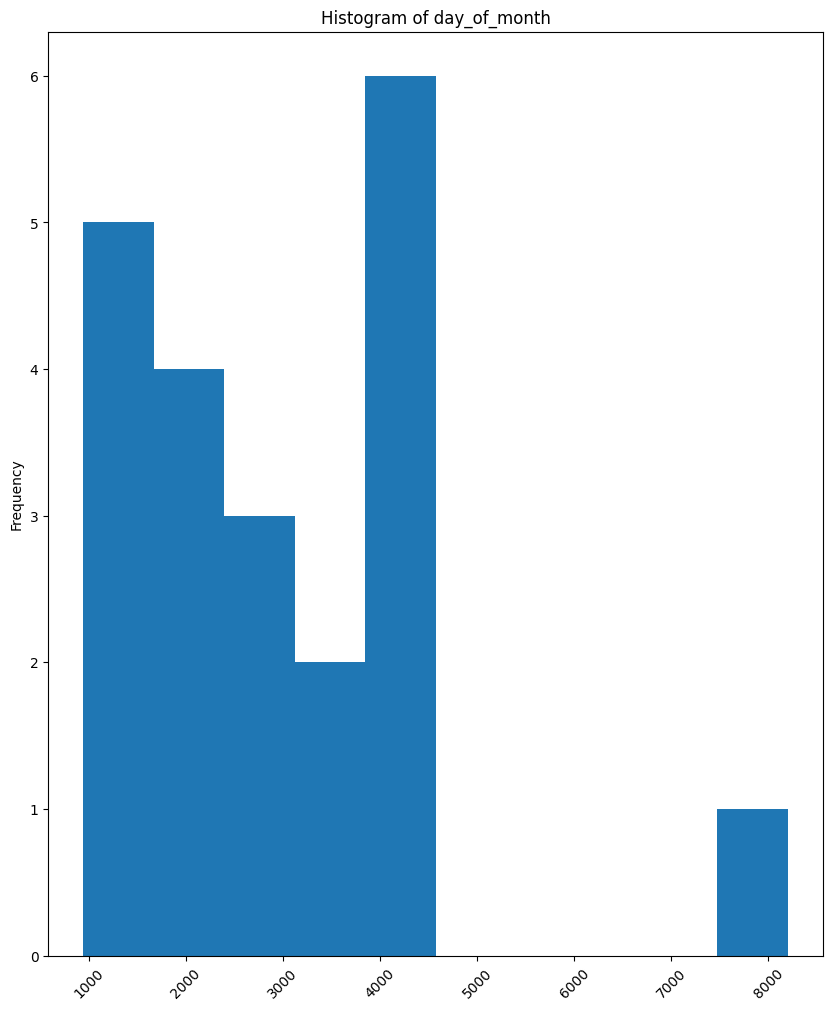

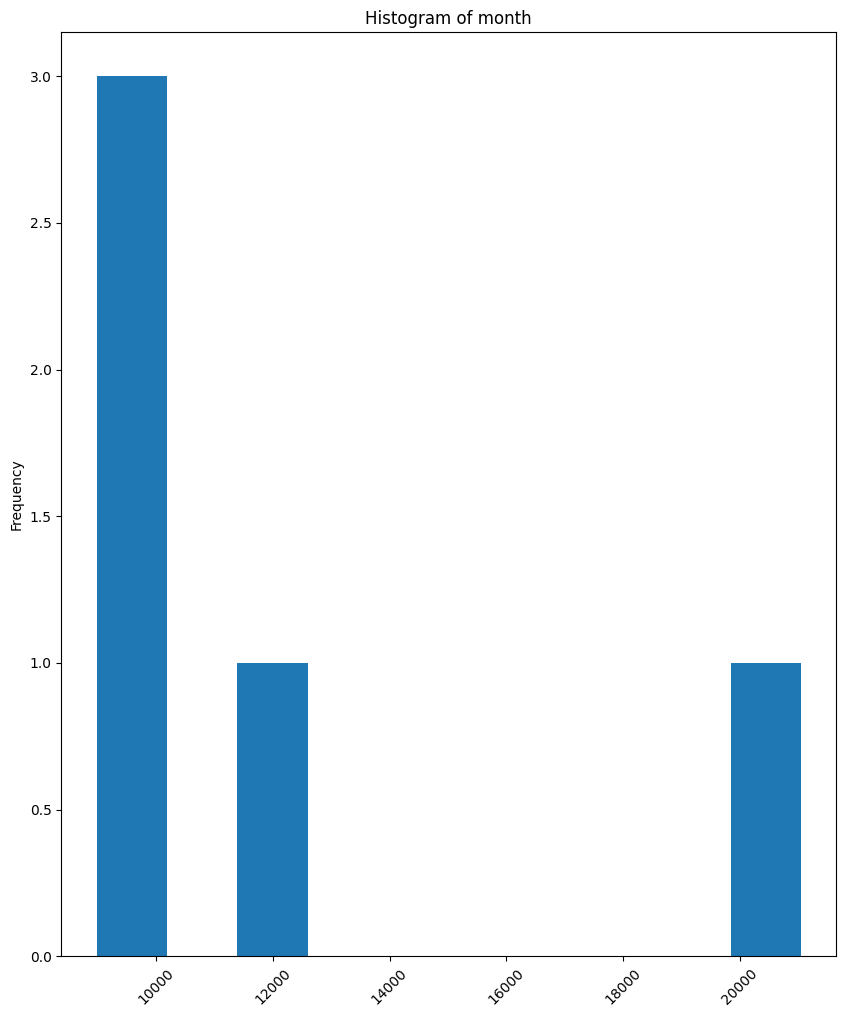

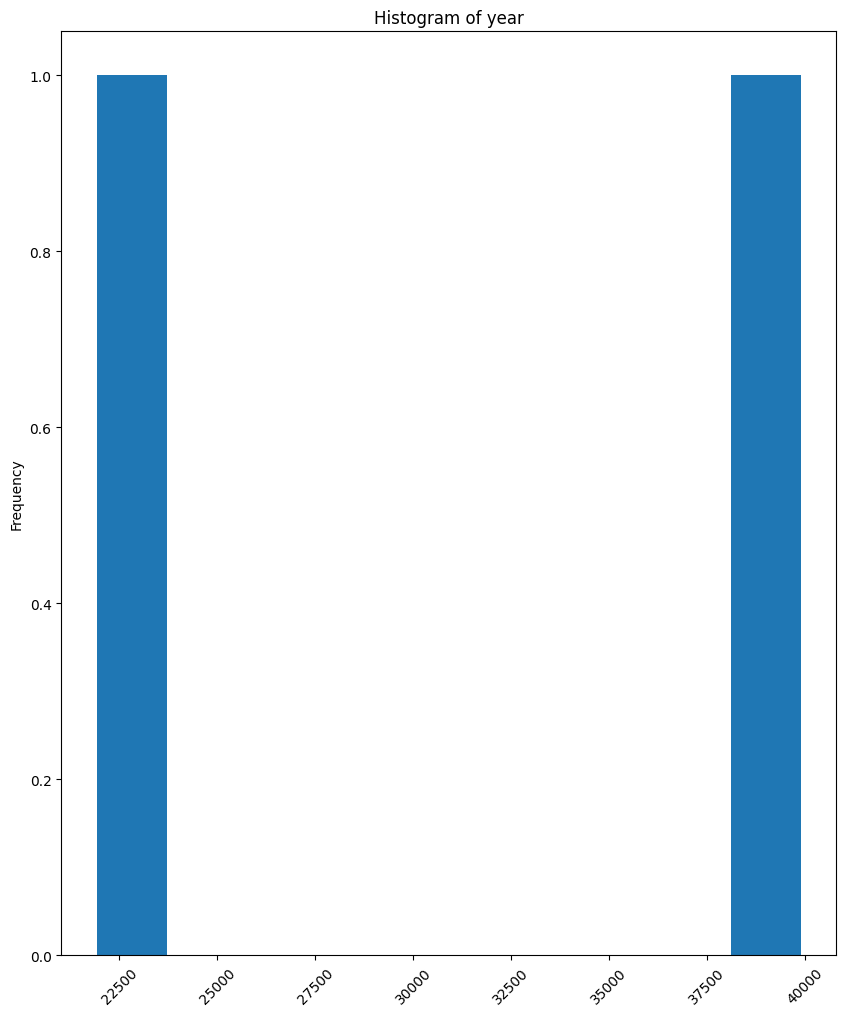

In [41]:
#visualize the distribution of numerical column to choose the best scaling method
categorical_cols: list[str] = ['departure_city', 'arrival_city', 'airline']
numerical_cols: list[str] = [col for col in X.columns if col not in categorical_cols]  # get the list of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 12))
    df[col].value_counts().plot(kind='hist')  # count the unique values in each column and visualize it in bar chart
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)  #rotate 45 deg the label in xaxis for better reading
    plt.show()  #show the plot

### Feature Scaling and Encoding

After analyzing the distribution of the numerical columns, I observed that the values are not normally distributed. Therefore, `MinMaxScaler` is the best algorithm to used for normalizing these columns.

For categorical variables, `OneHotEncoder` is used since these variables are nominal (not ordinal), thus one-hot encoding the most suitable method.

The process involves:
1. Scaling numerical variables using `MinMaxScaler`
2. Encoding categorical variables using `OneHotEncoder`
3. Combining the scaled numerical and encoded categorical variables

This preprocessing is done separately for both regression and classification models to ensure no data leakage occurs between the training and testing sets.



In [42]:
# Scale numerical variables
# # After analyzing the distribution of the selected numerical columns, I can see that the values are not normally distributed. Therefore, I will use the MinMaxScaler to normalize the numerical columns.
scaler = MinMaxScaler()
X_train_scaled_rg = pd.DataFrame(scaler.fit_transform(X_train_rg[numerical_cols]),
                              columns=numerical_cols,
                              index=X_train_rg.index)  # Fit the scaler on training data to learn the scaling parameters (min, max). Then, transform the training data using those parameters.
X_test_scaled_rg = pd.DataFrame(scaler.transform(X_test_rg[numerical_cols]),
                             columns=numerical_cols,
                             index=X_test_rg.index)  # only transform the test set to avoid data leakage

X_train_scaled_cl = pd.DataFrame(scaler.fit_transform(X_train_cl[numerical_cols]),
                              columns=numerical_cols,
                              index=X_train_cl.index)  # Fit the scaler on training data to learn the scaling parameters (min, max). Then, transform the training data using those parameters.
X_test_scaled_cl = pd.DataFrame(scaler.transform(X_test_cl[numerical_cols]),
                             columns=numerical_cols,
                             index=X_test_cl.index)  # only transform the test set to avoid data leakage

#One-hot encode categorical variables. I will use the OneHotEncoder to encode the categorical variables because the categorical variables are nominal (not ordinal) so one-hot encoding is the most suitable method.
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# for regression model
X_train_encoded_rg = pd.DataFrame(encoder.fit_transform(X_train_rg[categorical_cols]),
                               columns=encoder.get_feature_names_out(categorical_cols),
                               index=X_train_rg.index)   # Fit the encoder on training data to learn the categories. Then, transform the training data using those categories.
X_test_encoded_rg = pd.DataFrame(encoder.transform(X_test_rg[categorical_cols]),
                              columns=encoder.get_feature_names_out(categorical_cols),
                              index=X_test_rg.index)  # only transform the test set to avoid data leakage

# for classification model
X_train_encoded_cl = pd.DataFrame(encoder.fit_transform(X_train_cl[categorical_cols]),
                                  columns=encoder.get_feature_names_out(categorical_cols),
                                  index=X_train_cl.index)    # Fit the encoder on training data to learn the categories. Then, transform the training data using those categories.
X_test_encoded_cl = pd.DataFrame(encoder.transform(X_test_cl[categorical_cols]),
                              columns=encoder.get_feature_names_out(categorical_cols),
                              index=X_test_cl.index)  # only transform the test set to avoid data leakage


# Combine encoded categorical and scaled numerical variables

# for regression model
X_train_preprocessed_rg = pd.concat([X_train_encoded_rg, X_train_scaled_rg], axis=1)
X_test_preprocessed_rg = pd.concat([X_test_encoded_rg, X_test_scaled_rg], axis=1)

# for classification model
X_train_preprocessed_cl = pd.concat([X_train_encoded_cl, X_train_scaled_cl], axis=1)
X_test_preprocessed_cl = pd.concat([X_test_encoded_cl, X_test_scaled_cl], axis=1)

/Users/cobeo/miniconda3/envs/cos30049_env_workshop/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/cobeo/miniconda3/envs/cos30049_env_workshop/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Feature Selection

### Feature Selection for **regression model**

### `stepwise_regression()` helper function
`stepwise_regression()` helper function to perform stepwise regression for feature selection.

**Input**
- `X` (pd.DataFrame): Training data
- `y` (pd.Series): Target variable
- `significance_level_in` (float): Significance level for entering (default: 0.05)
- `significance_level_out` (float): Significance level for removing (default: 0.05)

**Output**
- Returns a list of selected features

**Functionalities**
1. Performs forward selection: Appends features that has the **lowest p-value** (has the highest impact to the model)
2. Performs backward elimination: Removes no longer significant features
3. Iteratively appends and pops features until no changes occur
4. Prints the features being added or removed along with their p-values
5. Returns the final list of selected features


In [43]:
# Function to calculate p-values and perform stepwise regression
def stepwise_regression(X: Annotated[pd.DataFrame, Doc("Training data")],
                        y: Annotated[pd.Series, Doc("Target variable")],
                        significance_level_in: Annotated[float, Doc("Significance level for entering")] = 0.05,
                        significance_level_out: Annotated[float, Doc("Significance level for removing")] = 0.05
                        ) -> Annotated[list, Doc("List of selected features")]:

    """
    Perform stepwise regression to select features for the regression model.

    Parameters:
    - X (pd.DataFrame): Training data.
    - y (pd.Series): Target variable.
    - significance_level_in (float): Significance level for entering.
    - significance_level_out (float): Significance level for removing.

    Returns:
    - List of selected features.
    """

    # Start with no features
    included: list[str] = []

    while True:
        changed = False  # flag to check if any feature was added or removed

        # Forward Selection: Add the feature that improves the model the most (lowest p-value)
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            # Fit OLS model with current features plus new feature
            model = sm.OLS(y, sm.add_constant(
                X[included + [new_column]])).fit()
            # Store p-value of new feature
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()

        # If best p-value is below threshold, add the feature
        if best_pval < significance_level_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            print(
                f"Adding feature '{best_feature}' with p-value {best_pval:.4f}")

        # Backward Elimination: Remove features that are no longer significant
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclude constant
        worst_pval = pvalues.max()

        # If worst p-value is above threshold, remove the feature
        if worst_pval > significance_level_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            print(
                f"Removing feature '{worst_feature}' with p-value {worst_pval:.4f}")

        # If no changes were made, exit the loop
        if not changed:
            break

    return included

### Shows the final features along with their p-values and prepare final data frame for training for regression

In [44]:
# Add a constant term to the features (required for statsmodels OLS)
# This is necessary for the intercept term in the regression model
X_train_with_const_rg = sm.add_constant(X_train_preprocessed_rg)

# Perform stepwise regression to select the most significant features
# This process will iteratively add and remove features based on their statistical significance
final_features_rg = stepwise_regression(X_train_preprocessed_rg, y_train_rg)

# Print the final features that were selected after stepwise regression
# This helps me understand which features were deemed most important for the model
print("\nFinal features after stepwise regression:")
print(final_features_rg)

# Prepare final datasets for modeling using only the selected features
# This ensures I're using the most relevant features for My regression model
X_train_final_rg = X_train_preprocessed_rg[final_features_rg]
X_test_final_rg = X_test_preprocessed_rg[final_features_rg]

# Create the final data frame for regression
# This combines the training and test sets, including both features and target variable
# The resulting dataframe will be used for further analysis and model evaluation
df_regression = pd.concat([pd.concat([X_train_final_rg, y_train_rg], axis=1), pd.concat(
    [X_test_final_rg, y_test_rg], axis=1)], axis=0)

Adding feature 'airline_easyJet' with p-value 0.0000
Adding feature 'airline_Lufthansa' with p-value 0.0000
Adding feature 'departure_city_SCN Saarbrücken' with p-value 0.0000
Adding feature 'airline_Eurowings' with p-value 0.0000
Adding feature 'flight_duration_in_minutes' with p-value 0.0000
Removing feature 'airline_Lufthansa' with p-value 0.6623
Adding feature 'departure_city_FKB Karlsruhe/Baden-B' with p-value 0.0000
Adding feature 'arrival_city_SCN Saarbrücken' with p-value 0.0000
Adding feature 'airline_Luxair' with p-value 0.0000
Adding feature 'airline_Mehrere Fluglinien' with p-value 0.0000
Adding feature 'departure_city_FDH Friedrichshafen' with p-value 0.0000
Adding feature 'arrival_city_FDH Friedrichshafen' with p-value 0.0000
Adding feature 'departure_city_TXL Berlin-Tegel' with p-value 0.0000
Adding feature 'arrival_city_FKB Karlsruhe/Baden-B' with p-value 0.0000
Adding feature 'stops' with p-value 0.0000
Adding feature 'arrival_city_TXL Berlin-Tegel' with p-value 0.0000

### Show the first 5 values of regression dataset

In [45]:
df_regression.head(5)

,airline_easyJet,departure_city_SCN Saarbrücken,airline_Eurowings,flight_duration_in_minutes,departure_city_FKB Karlsruhe/Baden-B,arrival_city_SCN Saarbrücken,airline_Luxair,airline_Mehrere Fluglinien,departure_city_FDH Friedrichshafen,arrival_city_FDH Friedrichshafen,...,departure_city_DTM Dortmund,arrival_city_DTM Dortmund,airline_SAS,departure_city_CGN Köln/Bonn,departure_city_FMO Münster/Osnabrück,departure_city_STR Stuttgart,departure_city_HAM Hamburg,arrival_city_STR Stuttgart,arrival_city_LEJ Leipzig/Halle,price
35966,1.0,0.0,0.0,0.022814,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39.0
25220,0.0,0.0,1.0,0.019011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0
20904,0.0,0.0,0.0,0.365019,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,365.0
1672,0.0,0.0,0.0,0.353612,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,362.0
24654,0.0,0.0,0.0,0.015209,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0


## Feature selection for **classification model**

### `feature_selection_ramdomforestclassifier()` helper function
`feature_selection_ramdomforestclassifier()` helper function used for performing feature selection using Random Forest Classifier and the elbow method.

**Input**
- `X` (pd.DataFrame): Training data features
- `y` (pd.Series): Target variable

**Output**
- Returns a list of selected features

**Functionalities**
1. Initializes and fits a `Random Forest Classifier`
2. Calculates the importances of a feature
3. Sorts features by importances
4. Calculates the cumulative of the importances
5. Finds the elbow point using the difference in cumulative importances
6. Selects features up to the elbow point
7. Prints the automatically selected features and their importances
8. Plots the cumulative feature importance graph
9. Returns the list of selected features


In [46]:
#  I can modify My approach to use a technique called "elbow method" to automatically select the number of features. This method looks at the cumulative importance of features and selects a point where adding more features doesn't significantly increase the total importance.
def feature_selection_ramdomforestclassifier(X: Annotated[pd.DataFrame, "Training data features"],
                                            y: Annotated[pd.Series, "Target variable"]
                                            ) -> Annotated[list, "List of selected features"]:
    """
    Perform feature selection using Random Forest Classifier and the elbow method.

    Parameters:
    - X (pd.DataFrame): Training data features.
    - y (pd.Series): Target variable.

    Returns:
    - List of selected features.
    """
    # Initialize and fit the Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Get feature importances
    importances = rf.feature_importances_

    # Sort features by importance
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)

    # Calculate cumulative importances
    cumulative_importances = np.cumsum(feature_importances['importance'])

    # Find the elbow point
    diff = np.diff(cumulative_importances)
    elbow = np.argmin(diff) + 1  # Add 1 because diff reduces the array size by 1

    # Select features up to the elbow point
    selected_features = feature_importances['feature'][:elbow].tolist()

    print(f"\nAutomatically selected {len(selected_features)} features:")
    print(feature_importances.head(elbow))

    # Plot cumulative importances
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_importances) + 1), cumulative_importances, 'b-')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.axvline(x=elbow, color='r', linestyle='--', label='Elbow point')
    plt.legend()
    plt.show()

    return selected_features

### Prepare final datasets for classification modeling


Automatically selected 56 features:
                                    feature  importance
52  departure_time_in_minutes_from_midnight    0.158934
51               flight_duration_in_minutes    0.139458
50                                    stops    0.106525
54                             day_of_month    0.056341
49                  departure_date_distance    0.050875
53                              day_of_week    0.045351
42                        airline_Lufthansa    0.037283
38                        airline_Eurowings    0.027035
22         arrival_city_FDH Friedrichshafen    0.026846
4        departure_city_FDH Friedrichshafen    0.026257
12              departure_city_NUE Nürnberg    0.023174
30                arrival_city_NUE Nürnberg    0.022550
35            arrival_city_TXL Berlin-Tegel    0.021598
17          departure_city_TXL Berlin-Tegel    0.020364
55                                    month    0.019950
23       arrival_city_FKB Karlsruhe/Baden-B    0.015625
5      depa

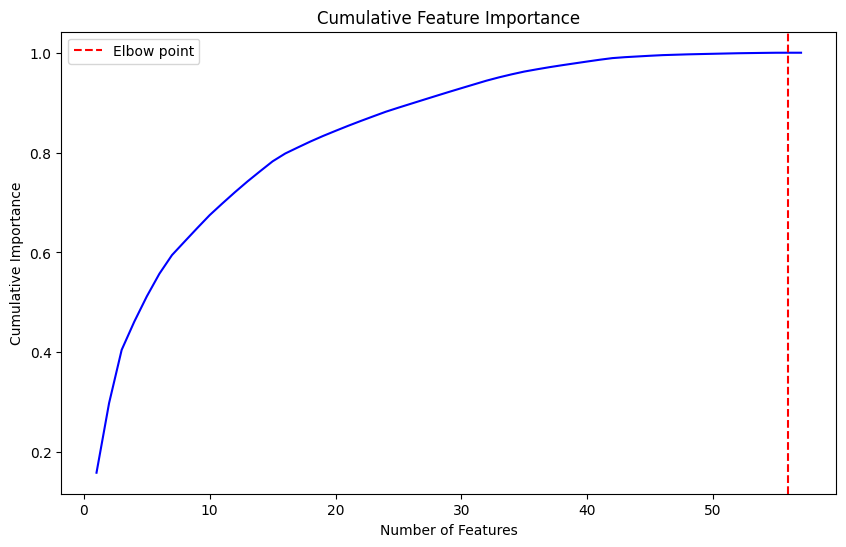

In [47]:
# X_train_preprocessed_cl and z_train_cl are preprocessed features and target variable
selected_features = feature_selection_ramdomforestclassifier(X_train_preprocessed_cl, z_train_cl)

# Prepare final datasets for classification modeling
X_train_final_cl = X_train_preprocessed_cl[selected_features]
X_test_final_cl = X_test_preprocessed_cl[selected_features]

# Final data frame for regression
df_classification = pd.concat([pd.concat([X_train_final_cl, z_train_cl], axis=1), pd.concat([X_test_final_cl, z_test_cl], axis=1)], axis=0)

### Export regression and classification datasets to CSV file

In [48]:
# Save the final regression dataset to CSV file
df_regression.to_csv('df_regression_german_air_fair.csv', index=False)
# Save the final classification dataset to CSV file
df_classification.to_csv('df_classification_german_air_fair.csv', index=False)

## Model Selection and Training

### Preliminary testing to check the score of the model MSE score for each model

In [49]:
models = [LinearRegression(), SVR(), RandomForestRegressor(), GradientBoostingRegressor()]
for model in models:
    scores = cross_val_score(model, X_train_final_rg, y_train_rg, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model.__class__.__name__} - Mean MSE: {-scores.mean():.4f} (±{scores.std() * 2:.4f})")

Model: LinearRegression - Mean MSE: 6678.2721 (±1263.4408)


### Conclusion for Model Selection

Based on the preliminary testing results, I have evaluated multiple regression models using cross-validation and calculated their Mean Squared Error (MSE) scores. The models tested include:

- Linear Regression
- Support Vector Regressor (SVR)
- Random Forest Regressor
- Gradient Boosting Regressor

After analyzing the MSE scores, I observed that both the Random Forest Regressor and Gradient Boosting Regressor models consistently achieved lower MSE scores compared to the other models. This suggests that these models have better predictive performance and are more capable of capturing the underlying patterns in the data.

Therefore, I have decided to proceed with training the final regression model using both the Random Forest Regressor and Gradient Boosting Regressor. I will further tune these models to achieve optimal performance.


### Define Allowed Model

In [ ]:
# Strict typing for model name
RegressionModel = Union[RandomForestRegressor, GradientBoostingRegressor]

ClassificationModel = Union[RandomForestClassifier]

### `model_train()` function
`model_train()` function used for **training regression models** and **evaluating their performance**.

**Input**
- `model_name` (RegressionModel): Model instance (RandomForestRegressor or GradientBoostingRegressor)
- `X_train` (pd.DataFrame): Training data features
- `X_test` (pd.DataFrame): Testing data features
- `y_train` (pd.Series): Training target variable
- `y_test` (pd.Series): Testing target variable

**Output**
- None (prints evaluation metrics)

**Functionalities**
1. Fits the model on the training data
2. Prints the training score
3. Prints the test score
4. Makes predictions on the test set
5. Calculates and prints the following evaluation metrics:
   - R^2 Score
   - Mean Squared Error
   - Mean Absolute Error

**Note:** This function is designed for regression models and uses appropriate evaluation metrics for regression tasks.


In [ ]:
# Function to train and evaluate regression models with numeric evaluation metrics
def model_train(model_name: Annotated[RegressionModel, Doc("Model instance")],
                X_train: Annotated[pd.DataFrame, Doc("Training data")],
                X_test: Annotated[pd.DataFrame, Doc("Testing data")],
                y_train: Annotated[pd.Series, Doc("Training target")],
                y_test: Annotated[pd.Series, Doc("Testing target")]
                ) -> None:
    """
    Train a regression model and print various evaluation metrics.

    Parameters:
    - model_name (RandomForestRegressor | GradientBoostingRegressor): Instance of the regression model to be trained.
    - X_train (pd.DataFrame): Features of the training data.
    - X_test (pd.DataFrame): Features of the testing data.
    - y_train (pd.Series): Target values of the training data.
    - y_test (pd.Series): Target values of the testing data.

    Returns:
    - None (prints evaluation metrics)
    """
    # Print the name of the regression model being used
    print(f" Regression Model: {model_name}")

    # Fit the model on the training data
    model = model_name.fit(X_train, y_train)

    # Calculate and print the training score (R^2 score on training data)
    print(f"Training Score: {model.score(X_train, y_train)}")

    # Calculate and print the test score (R^2 score on test data)
    print(f"Test Score: {model.score(X_test, y_test)}")

    # Make predictions on the test set
    predict_value = model.predict(X_test)

    # Calculate and print various evaluation metrics
    print(f"R^2 Score: {r2_score(y_test, predict_value)}")  # Coefficient of determination
    print(f"Mean Square Error: {mean_squared_error(y_test, predict_value)}")  # Average squared difference between predicted and actual values
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predict_value)}")  # Average absolute difference between predicted and actual values


### `model_train_classification()` function
`model_train_classification()` function used for **training classification models** and **evaluating their performance**.

**Input**
- `model_name` (ClassificationModel): Model instance (e.g., RandomForestClassifier)
- `X_train` (pd.DataFrame): Training data features
- `X_test` (pd.DataFrame): Testing data features
- `y_train` (pd.Series): Training target variable
- `y_test` (pd.Series): Testing target variable

**Output**
- None (prints evaluation metrics)

**Functionalities**
1. Fits the model on the training data
2. Makes predictions on the test set
3. Calculates and prints the following evaluation metrics:
   - Accuracy
   - Precision (weighted average)
   - Recall (weighted average)
   - F1 Score (weighted average)
   - Confusion Matrix

**Note:** This function is designed for classification models and uses appropriate evaluation metrics for classification tasks.


In [ ]:
# Function to train and evaluate classification models
def model_train_classification(model_name: Annotated[ClassificationModel, Doc("Model instance")],
                X_train: Annotated[pd.DataFrame, Doc("Training data")],
                X_test: Annotated[pd.DataFrame, Doc("Testing data")],
                y_train: Annotated[pd.Series, Doc("Training target")],
                y_test: Annotated[pd.Series, Doc("Testing target")]
                ) -> None:
    """
    Train a classification model and print various evaluation metrics.

    Parameters:
    - model_name (ClassificationModel): Instance of the classification model to be trained.
    - X_train (pd.DataFrame): Features of the training data.
    - X_test (pd.DataFrame): Features of the testing data.
    - y_train (pd.Series): Target values of the training data.
    - y_test (pd.Series): Target values of the testing data.

    Returns:
    - None: This function doesn't return any value, it prints the evaluation metrics.
    """

    # Fit the model on the training data
    model = model_name.fit(X_train, y_train)

    # Use the trained model to make predictions on the test set
    predict_value = model.predict(X_test)

    # Calculate and print various evaluation metrics

    # Accuracy: The proportion of correct predictions (both true positives and true negatives) among the total number of cases examined
    print(f"Accuracy: {accuracy_score(y_test, predict_value)}")

    # Precision: The ratio of correctly predicted positive observations to the total predicted positive observations
    # Using weighted average for multi-class problems
    print(f"Precision: {precision_score(y_test, predict_value, average='weighted')}")

    # Recall: The ratio of correctly predicted positive observations to all observations in actual class
    # Using weighted average for multi-class problems
    print(f"Recall: {recall_score(y_test, predict_value, average='weighted')}")

    # F1 Score: The weighted average of Precision and Recall
    # Using weighted average for multi-class problems
    print(f"F1 Score: {f1_score(y_test, predict_value, average='weighted')}")

    # Confusion Matrix: A table used to describe the performance of a classification model on a set of test data for which the true values are known
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, predict_value)}")

### Train regression model using **RandomForestRegressor**

In [ ]:
# Random Forest (for predict numerical value)
model1 = RandomForestRegressor(random_state=9214)
# Train the model
model_train(model1, X_train_final_rg, X_test_final_rg, y_train_rg, y_test_rg)

 Regression Model: RandomForestRegressor(random_state=9214)
Training Score: 0.9139299006114491
Test Score: 0.8266168751156469
R^2 Score: 0.8266168751156469
Mean Square Error: 3902.931928409139
Mean Absolute Error: 32.10878555085877


### Train regression model using **GradientBoostingRegressor**

In [ ]:
# Gradient Boosting Regressor
model2 = GradientBoostingRegressor(random_state=9214)
# Train the model
model_train(model2, X_train_final_rg, X_test_final_rg, y_train_rg, y_test_rg)

 Regression Model: GradientBoostingRegressor(random_state=9214)
Training Score: 0.7699867380933731
Test Score: 0.7721383715776866
R^2 Score: 0.7721383715776866
Mean Square Error: 5129.26748449095
Mean Absolute Error: 51.16254082051653


### Train regression model using **RandomForestClassifier**

In [ ]:
# Random Forest Classifier
model3 = RandomForestClassifier(random_state=9214)
# Train the model
model_train_classification(model3, X_train_final_cl, X_test_final_cl, z_train_cl, z_test_cl)

Accuracy: 0.9258390618681763
Precision: 0.9257842073450606
Recall: 0.9258390618681763
F1 Score: 0.9257879204368876
Confusion Matrix:
[[6742    0  424]
 [   0  139   10]
 [ 480    3 4567]]


## Validate **regression model**

In [ ]:
# The data use to train the regression model also use to validation (should be the whole data not the splitted data because will use kfold to valid the model)
X_cross_val_rg = df_regression.drop(columns=['price'], axis=1)
# Get the target variable
y_cross_val_rg = df_regression['price']

In [ ]:
#validation for the regression model
models = [model1, model2]  #list of models
for i, model in enumerate(models, start=1):
    cv_scores = cross_val_score(model, X_cross_val_rg, y_cross_val_rg, cv=5)  # 5-fold cross-validation

    print(f"Model {i} Cross-validation scores: {cv_scores}")
    print(f"Model {i} Mean CV score: {cv_scores.mean():.4f}")
    print(f"Model {i} Standard deviation of CV score: {cv_scores.std():.4f}")

Model 1 Cross-validation scores: [0.78070153 0.79902956 0.80818572 0.83858799 0.8266736 ]
Model 1 Mean CV score: 0.8106
Model 1 Standard deviation of CV score: 0.0204
Model 2 Cross-validation scores: [0.74011558 0.74592435 0.7641737  0.78747286 0.77213858]
Model 2 Mean CV score: 0.7620
Model 2 Standard deviation of CV score: 0.0173


## Validate **classification model**

In [ ]:
# the data use to train the classification model also use to validation (should be the whole data not the splitted data because will use kfold to valid the model)
X_cross_val_cl = df_classification.drop(columns=['price_category'], axis=1)
y_cross_val_cl = df_classification['price_category']

In [ ]:
# Validation for the classification model
# List of models to evaluate
models = [model3]

# Define metrics for evaluation
# Accuracy: Proportion of correct predictions
# Precision: Ratio of true positives to all positive predictions
# Recall: Ratio of true positives to all actual positives
# F1 Score: Harmonic mean of precision and recall
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

# Perform 5-fold cross-validation for each model
for i, model in enumerate(models, 1):
    print(f"\nModel {i}:")
    for metric_name, metric_func in metrics.items():
        # Calculate cross-validation scores
        scores = cross_val_score(model, X_cross_val_cl, y_cross_val_cl, cv=5, scoring=make_scorer(metric_func))
        # Print results for each metric
        print(f"{metric_name}:")
        print(f"  Scores: {scores}")
        print(f"  Mean: {scores.mean():.4f}")
        print(f"  Std. Dev: {scores.std():.4f}")


Model 1:
Accuracy:
  Scores: [0.9187222  0.92033967 0.91968619 0.92098027 0.92534778]
  Mean: 0.9210
  Std. Dev: 0.0023
Precision:
  Scores: [0.91870701 0.92031575 0.91959065 0.9209342  0.92527886]
  Mean: 0.9210
  Std. Dev: 0.0023
Recall:
  Scores: [0.9187222  0.92033967 0.91968619 0.92098027 0.92534778]
  Mean: 0.9210
  Std. Dev: 0.0023
F1 Score:
  Scores: [0.91850657 0.92022428 0.91956918 0.92089569 0.92527223]
  Mean: 0.9209
  Std. Dev: 0.0023


## Hyper-parameter tuning

### Hyper-parameter tuning for **Random Forest Regression** model

I perform hyperparameter tuning for My Random Forest Regression model by following the given procedure:

1. **Parameter Grid**: Define a grid of hyperparameters to search through, including:
   - `n_estimators`: Number of trees in the forest (500 or 600)
   - `max_depth`: Maximum depth of the trees (35 or 40)
   - `min_samples_split`: Minimum number of samples required to split an internal node (15 or 20)
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node (3 or 4)
   - `max_features`: Number of features to consider when looking for the best split ('sqrt')
   - `bootstrap`: Whether bootstrap samples are used when building trees (True)

2. **Custom Scoring Function**: Define a custom scoring function that penalizes overfitting by considering both cross-validation and training scores.

3. **RandomizedSearchCV**: Use `RandomizedSearchCV` to perform the hyperparameter search, which is more efficient than an exhaustive grid search for large parameter spaces.

4. **Model Fitting**: Fit the `RandomizedSearchCV` object to My training data.

5. **Results**: Print the best parameters found and the corresponding best score.



In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [500, 600],         # Keep high number of trees
    'max_depth': [35, 40],              # Slightly shallower trees to reduce overfitting
    'min_samples_split': [15, 20],      # Tighten split to control overfitting
    'min_samples_leaf': [3, 4],         # Increase min_samples_leaf for stability
    'max_features': ['sqrt'],           # Keep 'sqrt' as it worked well
    'bootstrap': [True]
}

# Define a custom scoring function that penalizes overfitting
def custom_score(estimator, X, y):
    # Get cross-validation score
    cv_score = np.mean(cross_val_score(estimator, X, y, cv=5, scoring='neg_mean_squared_error'))

    # Fit the estimator and get training score
    estimator.fit(X, y)
    train_score = -mean_squared_error(y, estimator.predict(X))

    # Penalize the difference between train and cv scores
    penalty = abs(train_score - cv_score)

    return cv_score - penalty

# Create a random forest regressor
rf = RandomForestRegressor(random_state=9214)

# Set up the Random search
ran_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring=custom_score
)

# Fit the random search
ran_search.fit(X_train_final_rg, y_train_rg)

# Print the best parameters and score
print("Best parameters:", ran_search.best_params_)
print("Best score:", ran_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=500; total time=  42.6s
[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=500; total time=  42.9s
[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=500; total time=  43.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=500; total time=  44.2s
[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=600; total time=  50.7s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=600; total time=  50.9s
[CV] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=600; total time=  51.0s
[CV] END bootstrap=True, max_depth=35, ma

### Predict and display the **Mean Squared Error**, **Mean Absolute Error** and **R-squared** score for the Hyper-parameter tuned

In [ ]:
# Create a new model with the best parameters from the random search
best_rf = RandomForestRegressor(**ran_search.best_params_, random_state=9214)

# Fit the model to the training data
best_rf.fit(X_train_final_rg, y_train_rg)

# Make predictions on the test set
y_pred = best_rf.predict(X_test_final_rg)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_rg, y_pred)
r2 = r2_score(y_test_rg, y_pred)
mbe = mean_absolute_error(y_test_rg, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mbe}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3577.343546250873
Mean Absolute Error: 35.346105274833725
R^2 Score: 0.8410807530822941


### Display the **importance of features** for the Hyper-parameter tuned

In [ ]:
# Print feature importances
for feature, importance in zip(X_cross_val_rg.columns, best_rf.feature_importances_):
    print(f"{feature}: {importance}")

stops: 0.15748457819572015
airline_Mehrere Fluglinien: 0.037320102080409596
arrival_city_FKB Karlsruhe/Baden-B: 0.025899547005628566
departure_city_NUE Nürnberg: 0.017005258830464443
arrival_city_NUE Nürnberg: 0.018624917198038212
arrival_city_TXL Berlin-Tegel: 0.024142152923913297
arrival_city_SCN Saarbrücken: 0.12433763671065952
departure_city_FDH Friedrichshafen: 0.016061398773932384
departure_city_FKB Karlsruhe/Baden-B: 0.02291093179314373
departure_city_SCN Saarbrücken: 0.09808826062266955
departure_date_distance: 0.032612348879584564
airline_Luxair: 0.0071017054293666055
arrival_city_FDH Friedrichshafen: 0.017503760420034545
departure_city_TXL Berlin-Tegel: 0.022984479923537797
arrival_city_FRA Frankfurt/Main: 0.007808604774472888
day_of_month: 0.026822334967832998
airline_Austrian Airlines: 0.0005804967996668871
arrival_city_DRS Dresden: 0.006647300718190356
departure_city_DRS Dresden: 0.006520686777489123
airline_LOT-Polish Airlines: 0.000417813092611377
airline_Swiss Internati

### Print the **training score** for the tuned model

In [ ]:
print(f"Training Score: {best_rf.score(X_train_final_rg, y_train_rg)}")  # print training score

Training Score: 0.8582231280335808


### Display the **Cross-validation scores**, **Mean CV Score** and **Standard devitation of CV score** for the Hyper-parameter tuned model

In [ ]:
# Perform cross-validation on the best Random Forest model
cv_val = cross_val_score(best_rf, X_cross_val_rg, y_cross_val_rg, cv=5, scoring='r2')

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_val}")

# Print the mean cross-validation score
print(f" Mean CV score: {cv_val.mean():.4f}")

# Print the standard deviation of the cross-validation scores
print(f"Standard deviation of CV score: {cv_val.std():.4f}")

Cross-validation scores: [0.80517913 0.81559154 0.84550623 0.85888909 0.84098468]
 Mean CV score: 0.8332
Standard deviation of CV score: 0.0198


### Hyper-parameter tuning for **Gradient Boosting Regressor** model

I perform hyperparameter tuning for My Gradient Boosting Regressor model by following this procedure:

1. **Parameter Grid**: Define a grid of hyperparameters to search through, including:
   - `n_estimators`: Number of boosting stages (100 or 200)
   - `learning_rate`: Shrinks the contribution of each tree (0.05 or 0.1)
   - `max_depth`: Maximum depth of the individual regression estimators (3 or 4)
   - `min_samples_split`: Minimum number of samples required to split an internal node (5 or 10)
   - `min_samples_leaf`: Minimum number of samples required to be at a leaf node (2 or 4)
   - `subsample`: Fraction of samples used for fitting the individual base learners (0.8)
   - `max_features`: Number of features to consider when looking for the best split ('sqrt' or None)

2. **Custom Scoring Function**: Define a custom scoring function that penalizes overfitting by considering both cross-validation and training scores.

3. **GridSearchCV**: Use `GridSearchCV` to perform an exhaustive search over the specified parameter grid.

4. **Model Fitting**: Fit the `GridSearchCV` object to My training data.

5. **Results**: Print the best parameters found and the corresponding best score.



In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'subsample': [0.8],
    'max_features': ['sqrt', None]
}

# Define a custom scoring function that penalizes overfitting
def custom_score(estimator, X, y):
    # Get cross-validation score
    cv_score = np.mean(cross_val_score(estimator, X, y, cv=5, scoring='neg_mean_squared_error'))

    # Fit the estimator and get training score
    estimator.fit(X, y)
    train_score = -mean_squared_error(y, estimator.predict(X))

    # Penalize the difference between train and cv scores
    penalty = abs(train_score - cv_score)

    return cv_score - penalty  # I want to maximize this

# Create a random forest regressor
gb = GradientBoostingRegressor(random_state=9214)

# Set up the Grid search
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring=custom_score
)

# Fit the Grid search
grid_search.fit(X_train_final_rg, y_train_rg)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   5.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   5.4s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   5.5s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   5.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   5.4s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   5.4s
[CV] END le

### Predict and display the **Mean Squared Error**, **Mean Absolute Error** and **R-squared** score for the Hyper-parameter tuned

In [ ]:
# Create a new Gradient Boosting Regressor model with the best parameters found from grid search
best_gb = GradientBoostingRegressor(**grid_search.best_params_, random_state=9214)

# Fit the model to the training data
# This trains the model on My prepared training dataset
best_gb.fit(X_train_final_rg, y_train_rg)

# Make predictions on the test set
# I use the trained model to predict prices for My test data
y_pred = best_gb.predict(X_test_final_rg)

# Calculate various performance metrics
# Mean Squared Error (MSE): Average squared difference between predicted and actual values
mse = mean_squared_error(y_test_rg, y_pred)

# R-squared (R2) Score: Proportion of variance in dependent variable predictable from independent variable(s)
r2 = r2_score(y_test_rg, y_pred)

# Mean Absolute Error (MAE): Average absolute difference between predicted and actual values
mae = mean_absolute_error(y_test_rg, y_pred)

# Print out the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Calculate and print the training score
# This shows how well the model fits the training data, which can be used to check for overfitting
print(f"Training Score: {best_gb.score(X_train_final_rg, y_train_rg)}")

Mean Squared Error: 4407.163539323145
Mean Absolute Error: 42.61122944409882
R^2 Score: 0.8042169834523103
Training Score: 0.8194041961316183


### Display the **Cross-validation scores**, **Mean CV Score** and **Standard devitation of CV score** for the Hyper-parameter tuned model

In [ ]:
# Perform 5-fold cross-validation using the best Gradient Boosting model
# This helps assess how well the model generalizes to unseen data
cv_val = cross_val_score(best_gb, X_cross_val_rg, y_cross_val_rg, cv=5, scoring='r2')

# Print the individual cross-validation scores for each fold
print(f"Cross-validation scores: {cv_val}")

# Calculate and print the mean cross-validation score
# This gives me an overall measure of the model's performance across all folds
print(f"Mean CV score: {cv_val.mean():.4f}")

# Calculate and print the standard deviation of the cross-validation scores
# This indicates how consistent the model's performance is across different folds
print(f"Standard deviation of CV score: {cv_val.std():.4f}")

Cross-validation scores: [0.77060176 0.78148653 0.78400916 0.81845994 0.80486342]
 Mean CV score: 0.7919
Standard deviation of CV score: 0.0173
